# Examen Final: Statistical Learning II
 * Franz Schubert Castillo Colocho: 22003738.
* Doris Andrea Paz Garcia: 22005266


In [30]:
#Cargamos las librerías.
import numpy as np
import pandas as pd
from summarytools import dfSummary

In [11]:
#Cargamos el dataset.
data= pd.read_csv('BankChurners.csv')

#### Eliminar columnas que no aportan

In [12]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]

# Utiliza el método drop para eliminar las columnas
data = data.drop(columnas_a_eliminar, axis=1)


In [15]:
dfSummary(data)
#Summary Tools: Devuelve estadisticas de cada variable, también presenta una gráfica.

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

In [23]:
#Verificamos los tipos de datos. 
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [16]:
#Clasificación de los tipos de columna 
def getDataColTypes(data):
    categoricas=[]
    continuas=[]
    discretas=[]
    for colName in data.columns:
        if(data[colName].dtype=='O'): 
            categoricas.append(colName)
        else: 
            if((data[colName].dtype=='int64') or (data[colName].dtypes=='float64')): 
                if(len(data[colName])<=30):
                    discretas.append(colName)
                else: 
                    continuas.append(colName)
    return discretas,continuas,categoricas
discretas,continuas,categoricas = getDataColTypes(data)
print(continuas)
print(discretas)
print(categoricas) 

['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
[]
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


### Preparación de datos

#### Tratamiento de outliers 

In [25]:
#Analizamos variables continuas y también se detectan outliers. 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plotDistBoxQQ(dataset, col):
    '''
    Descripción: Muestra las gráficas de distribución, Boxplot y QQ-Plot para detectar outliers.
    Input: dataset -> pandas dataframe, col -> string con nombre de columna.
    Output: Visualización de plots.
    '''

    plt.figure(figsize=(20, 6))

    plt.subplot(1, 3, 1)
    sns.distplot(dataset[col], bins=30)
    plt.title("Histograma y Densidad para " + col)

    plt.subplot(1, 3, 2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot para " + col)

    plt.subplot(1, 3, 3)
    stats.probplot(dataset[col], dist="norm", plot=plt)
    plt.title("QQ-Plot para " + col)



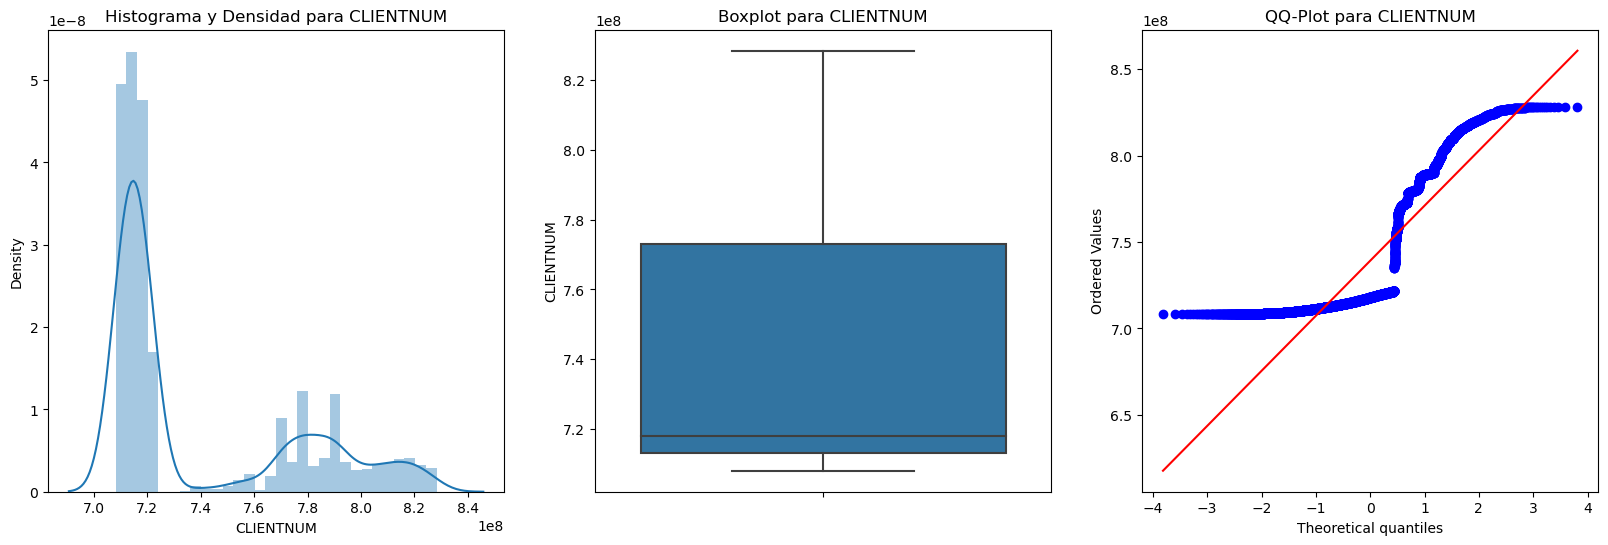

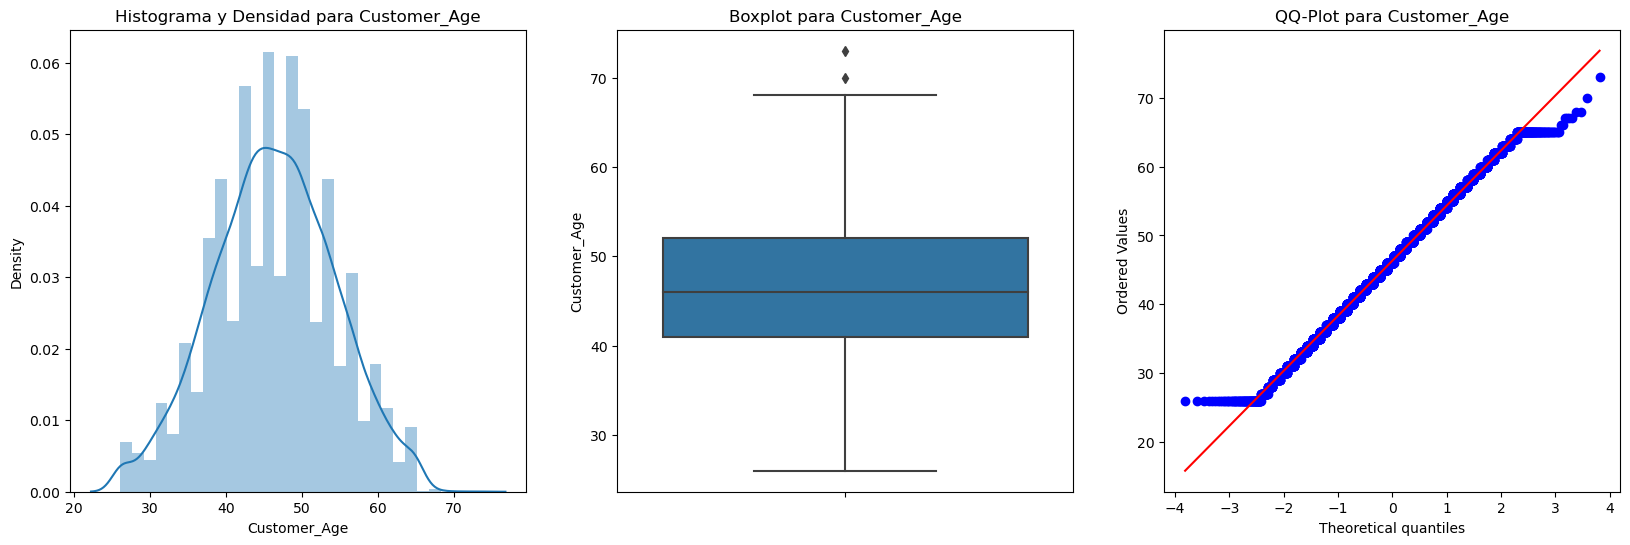

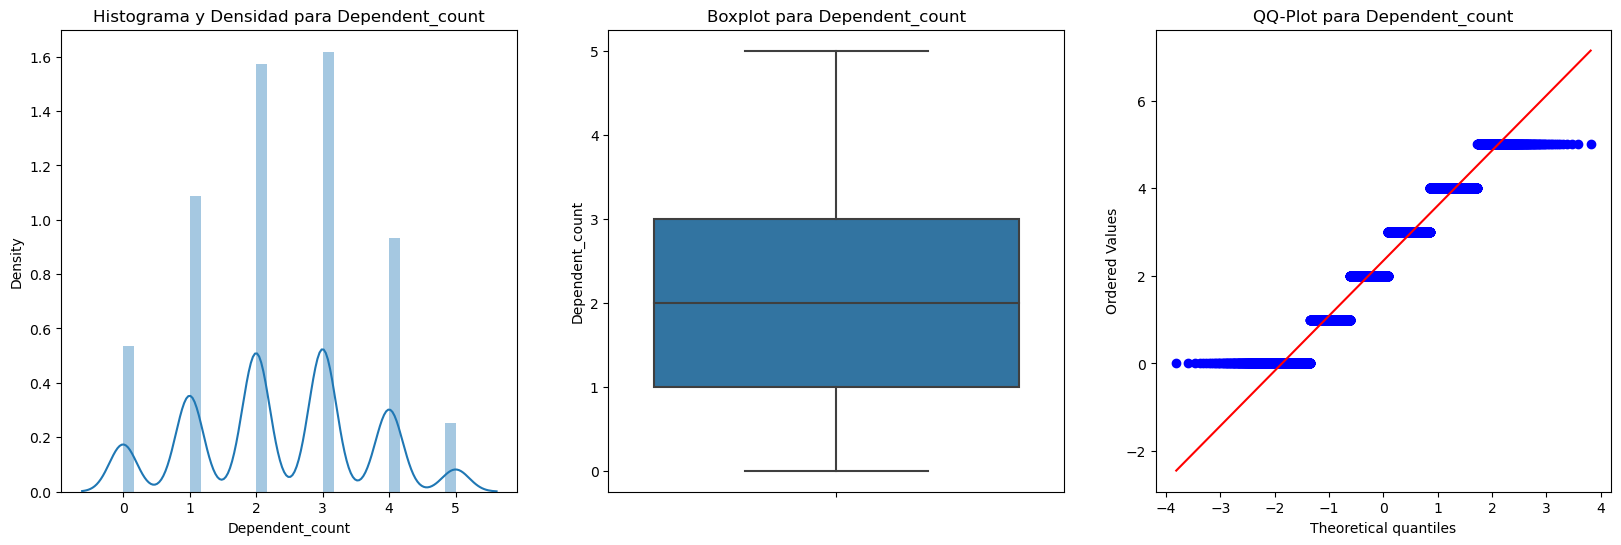

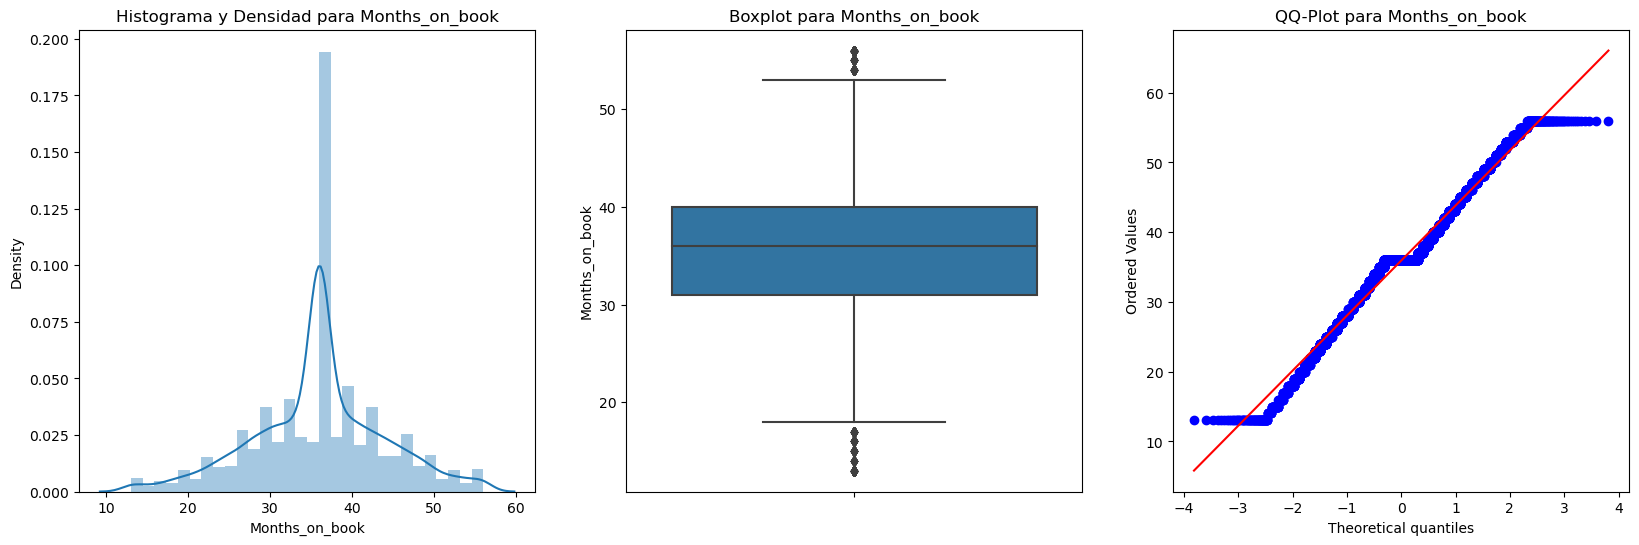

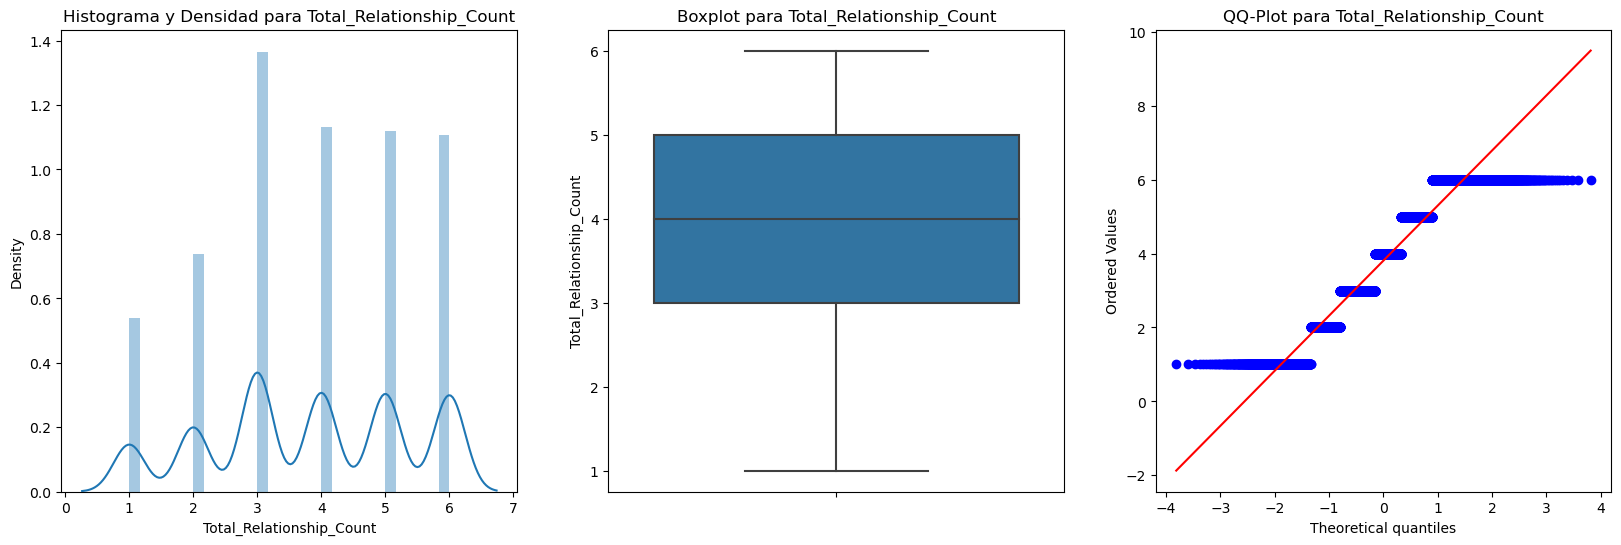

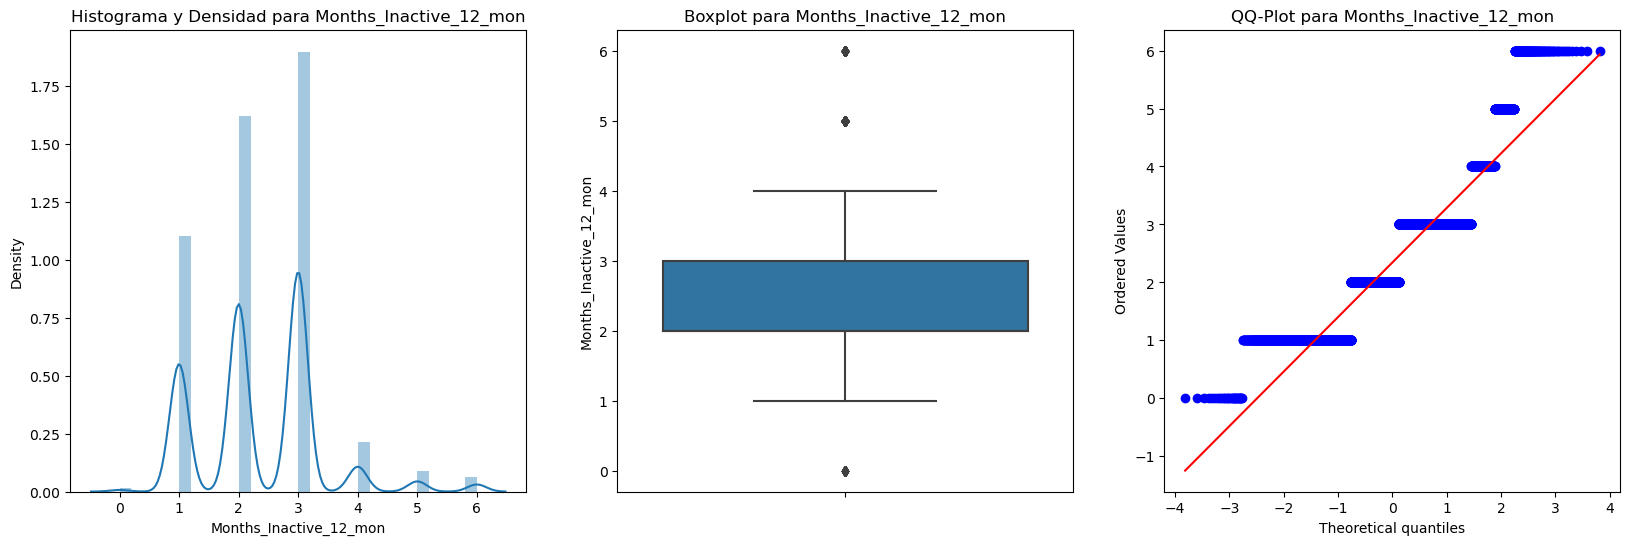

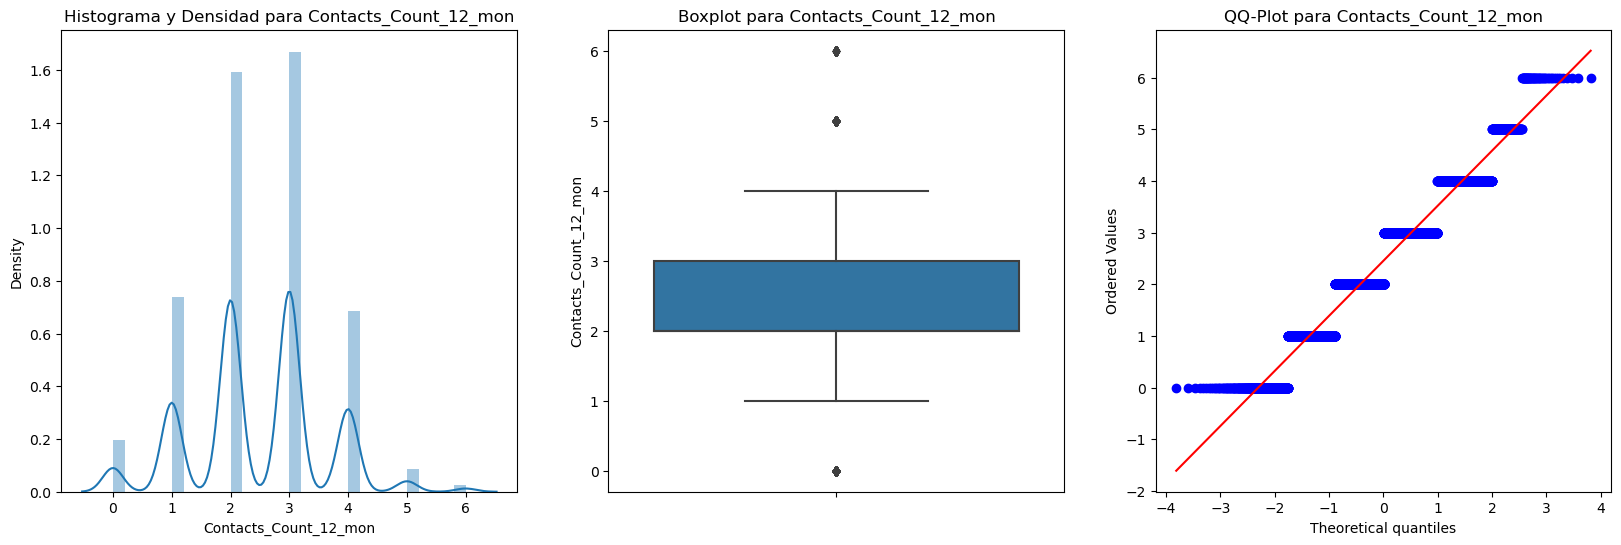

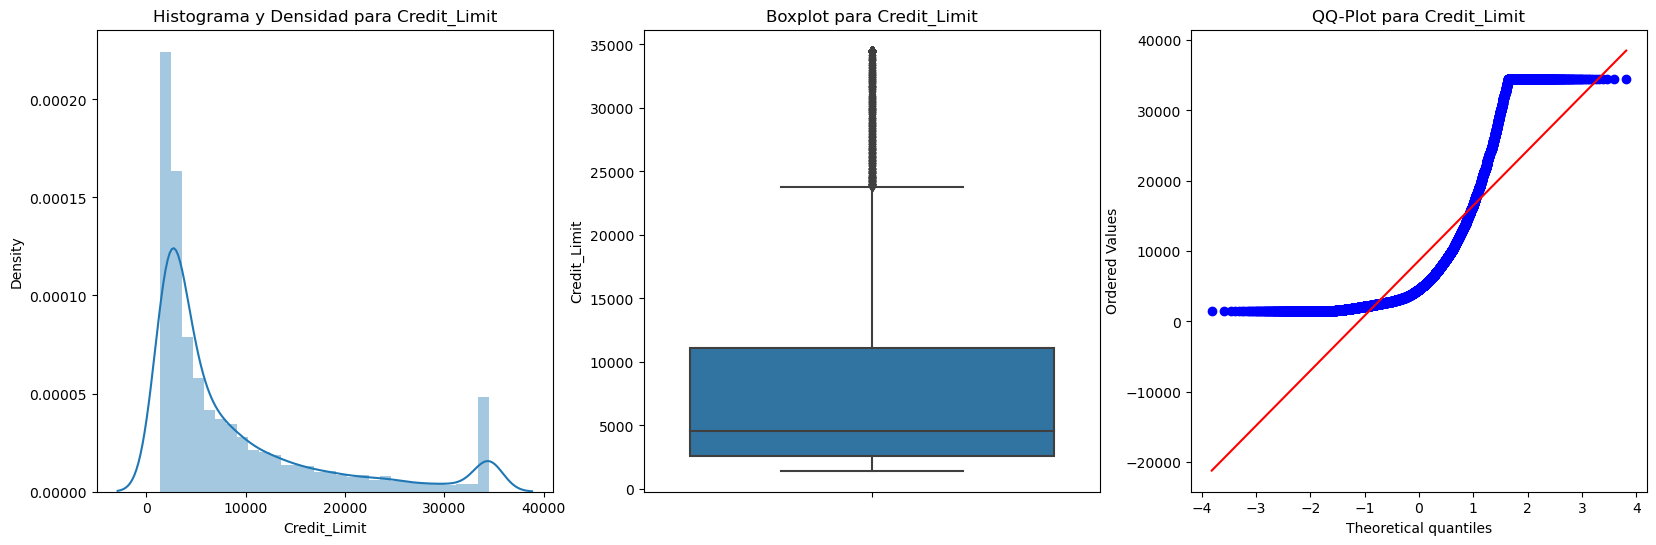

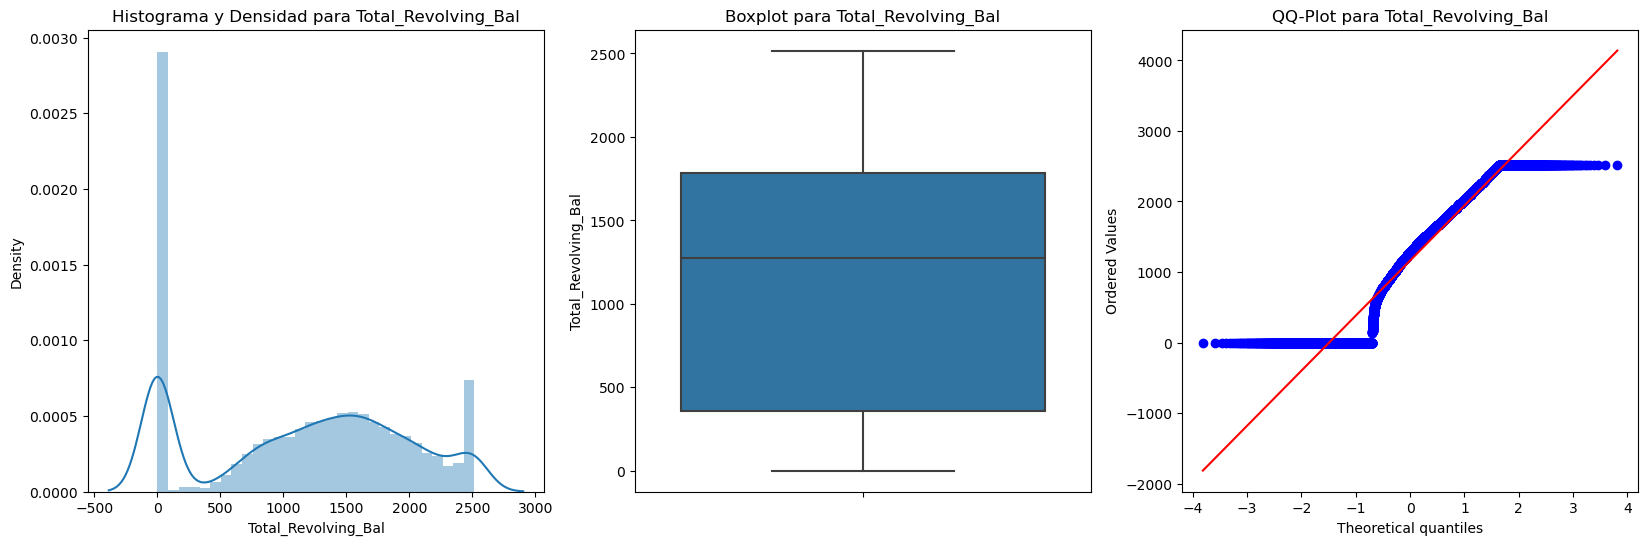

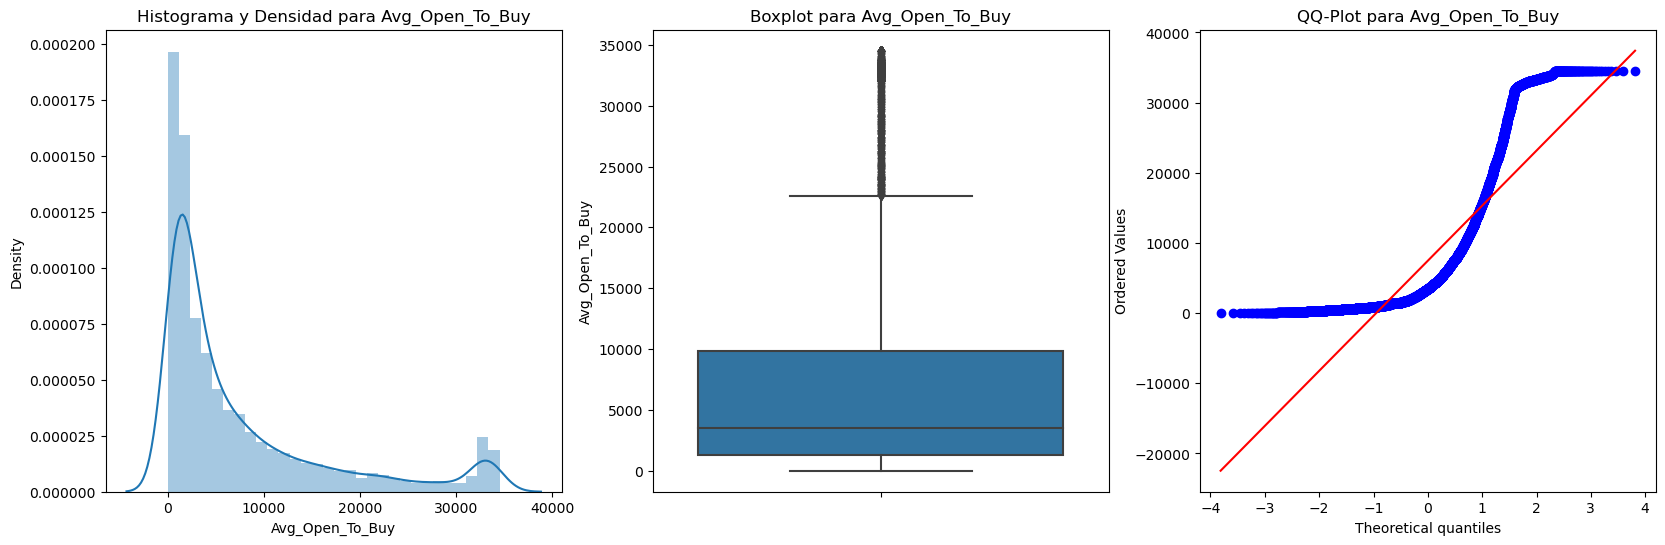

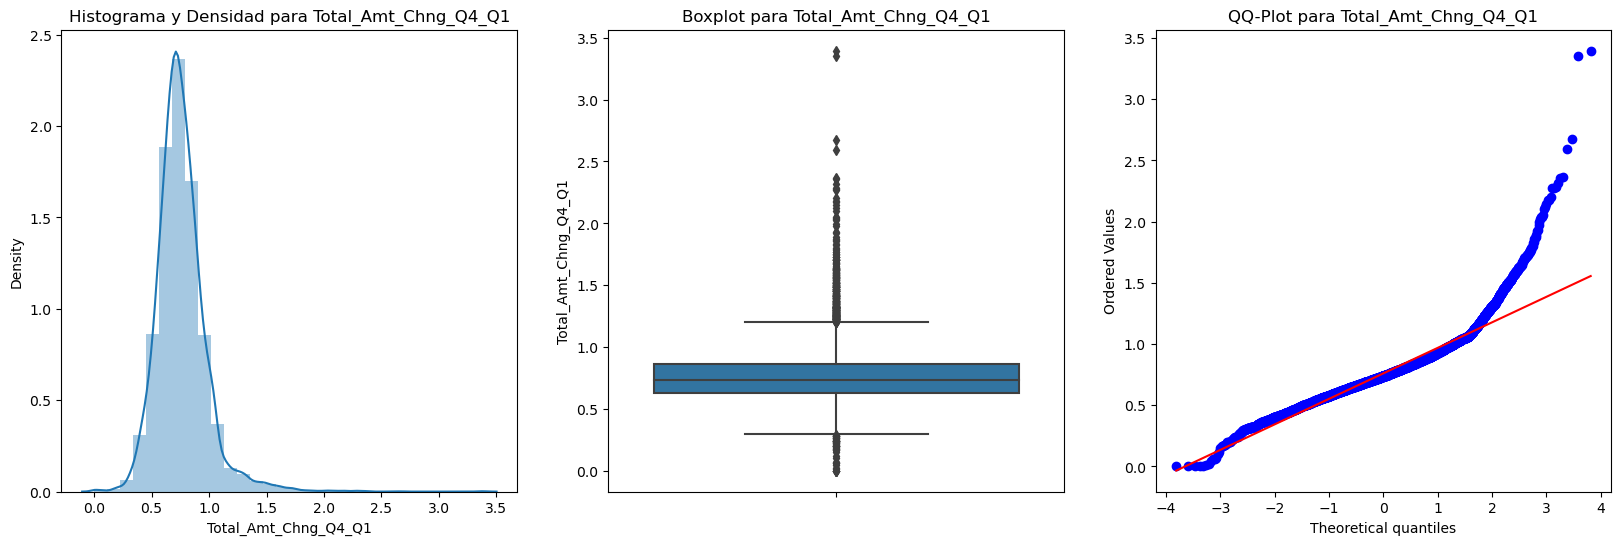

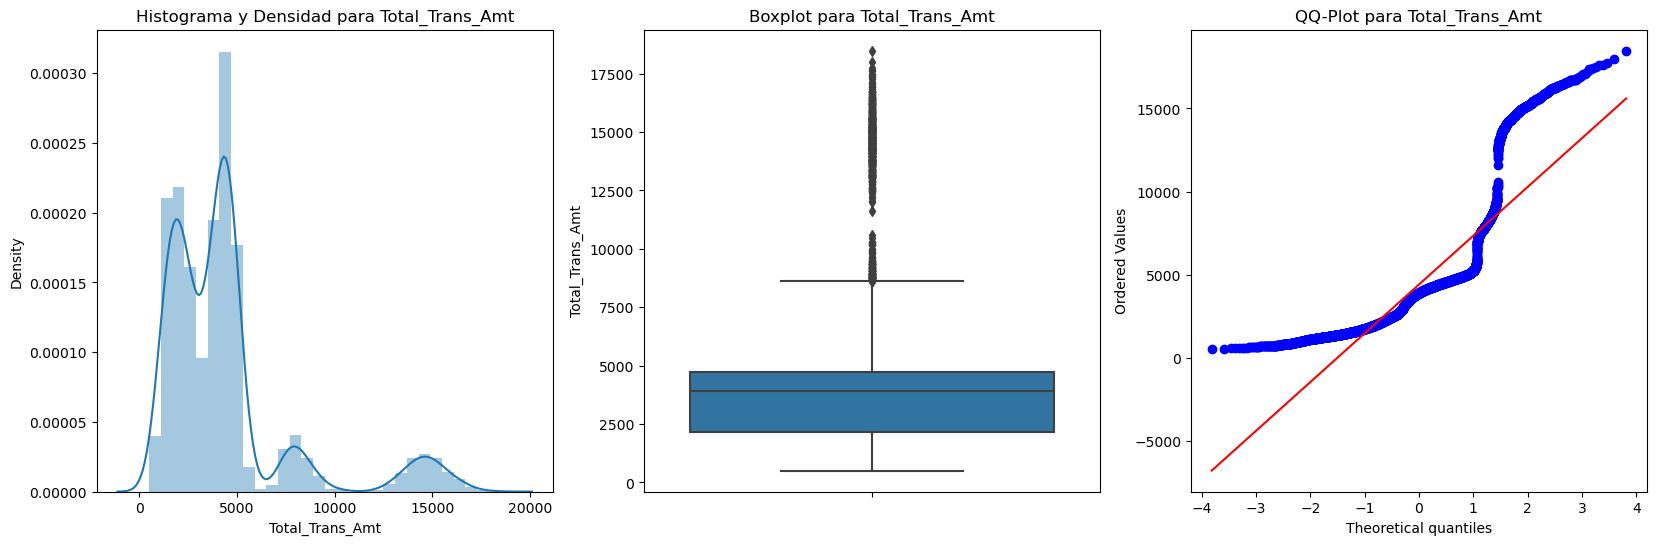

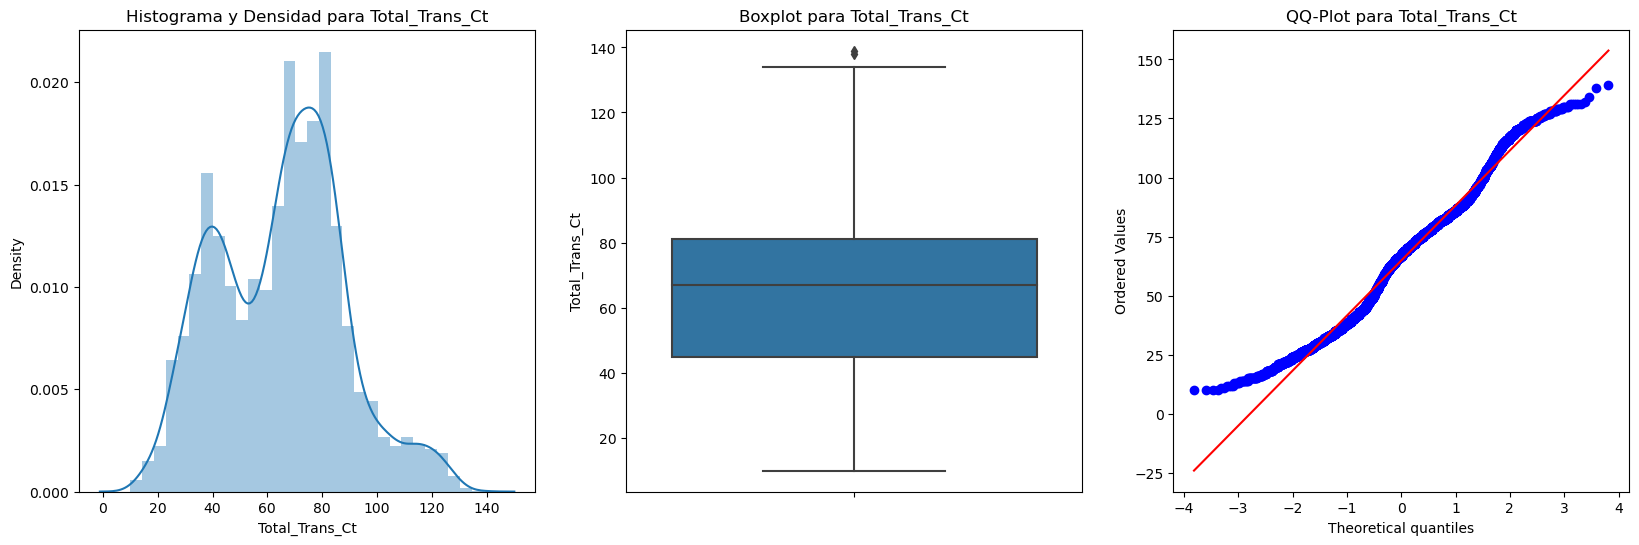

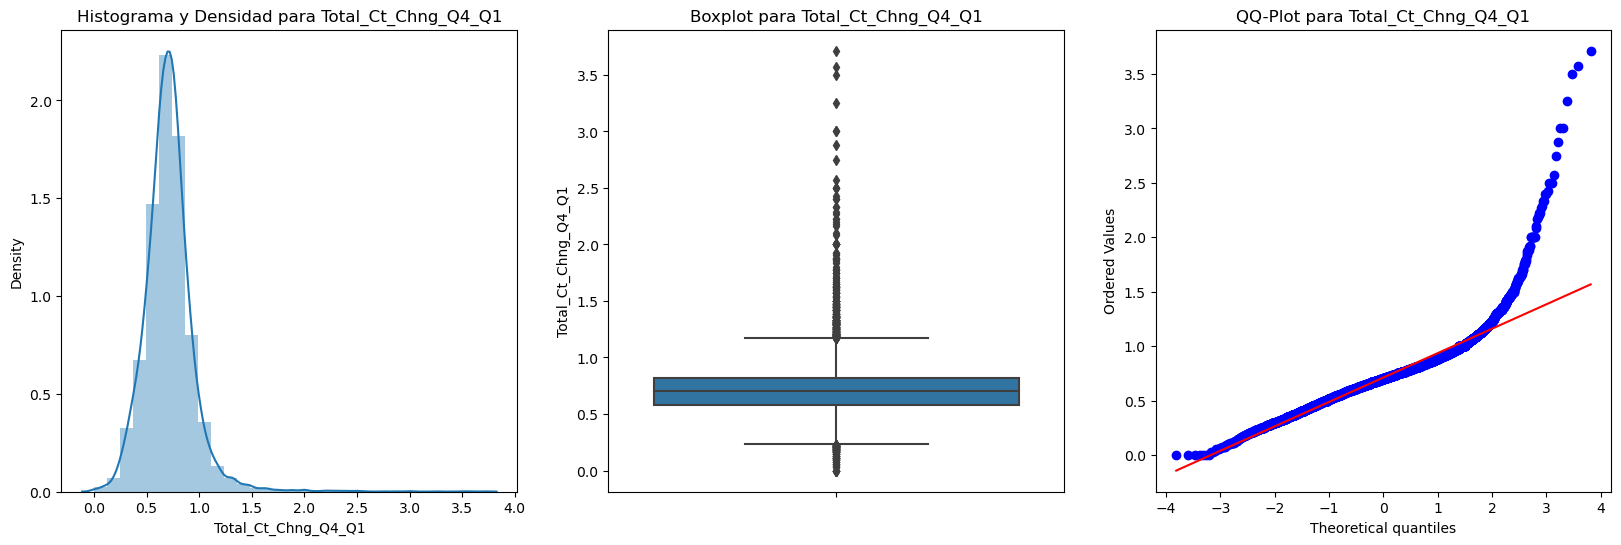

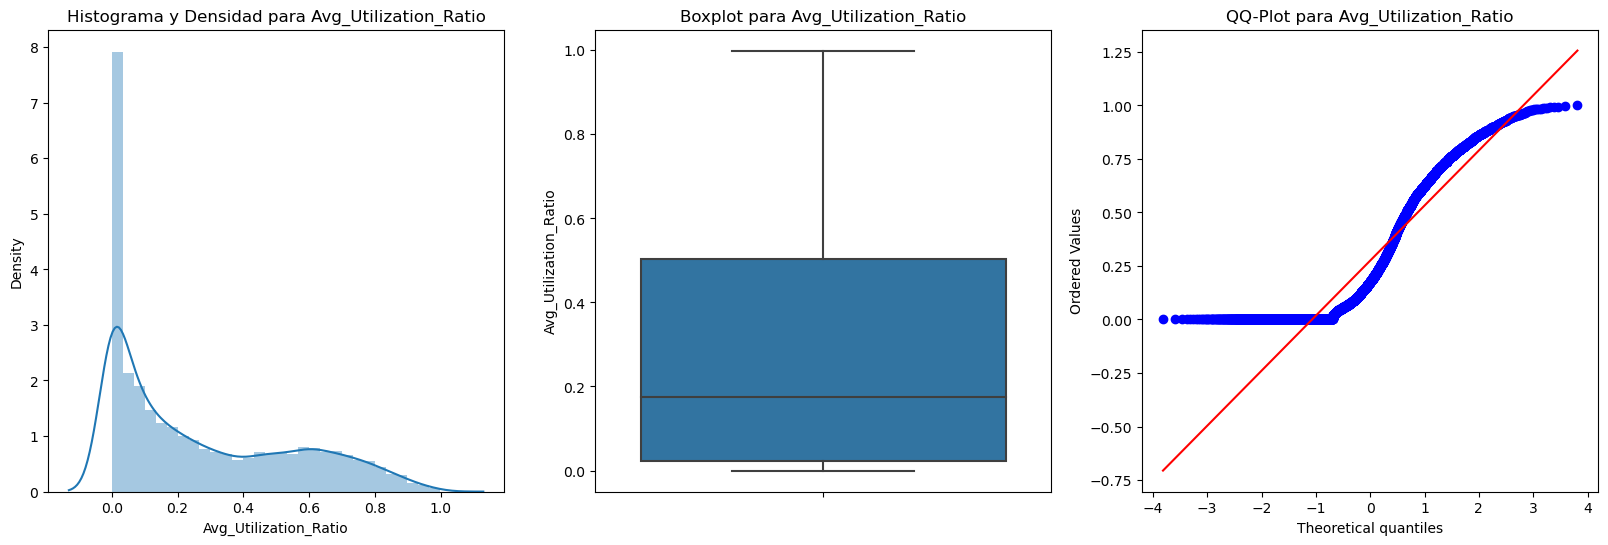

In [27]:
import warnings 
warnings.filterwarnings("ignore")
for col in continuas: 
    plotDistBoxQQ(data,col)

#### Utilizamos Capping para tratar los outliers. 

In [31]:
# Lista de columnas continuas en tu dataset que deseas analizar
columnas_continuas = ['Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Aplicar capping en cada columna
for col in columnas_continuas:
    LI, LS = detectOutliersLimits(data, col)  # Utiliza la función detectOutliersLimits que proporcionaste
    data[col] = np.where(data[col] < LI, LI, data[col])
    data[col] = np.where(data[col] > LS, LS, data[col])

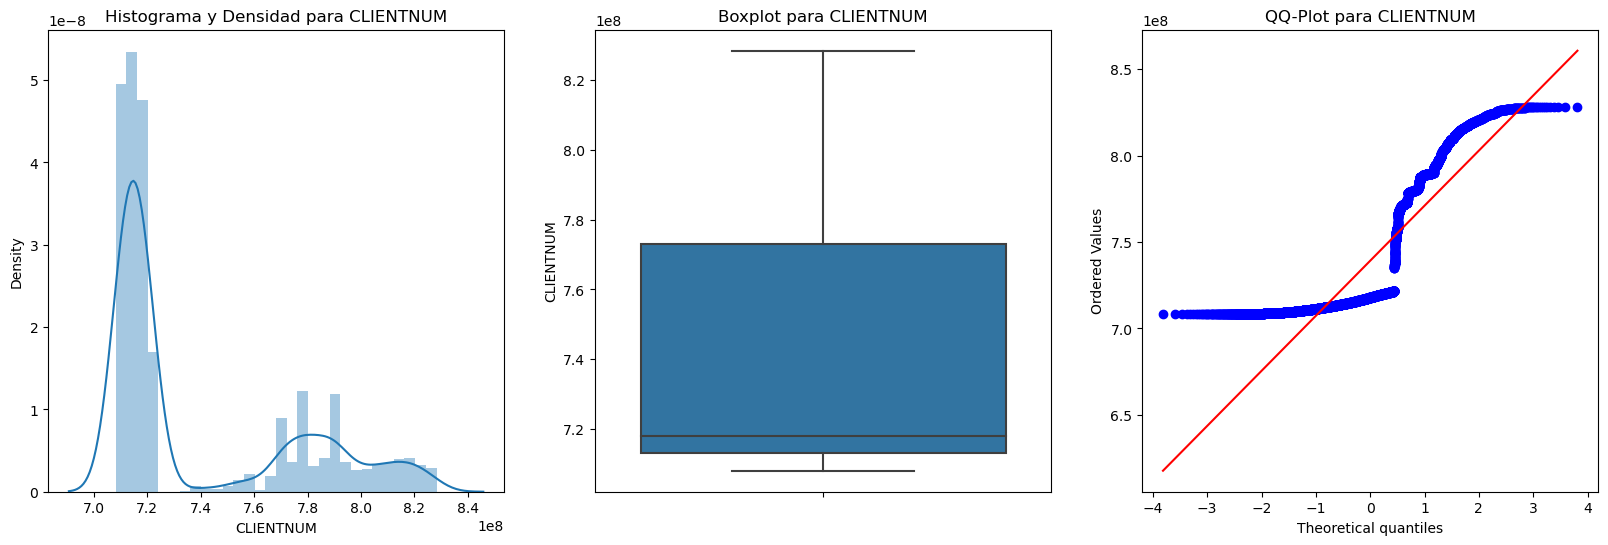

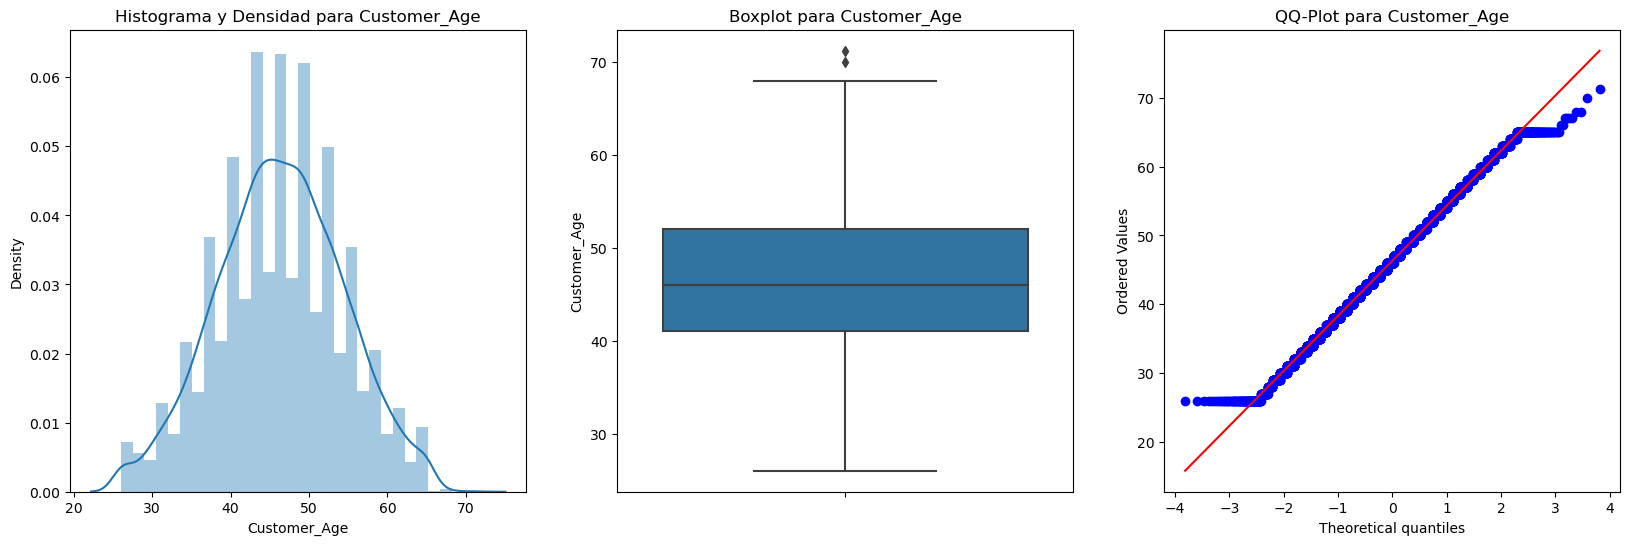

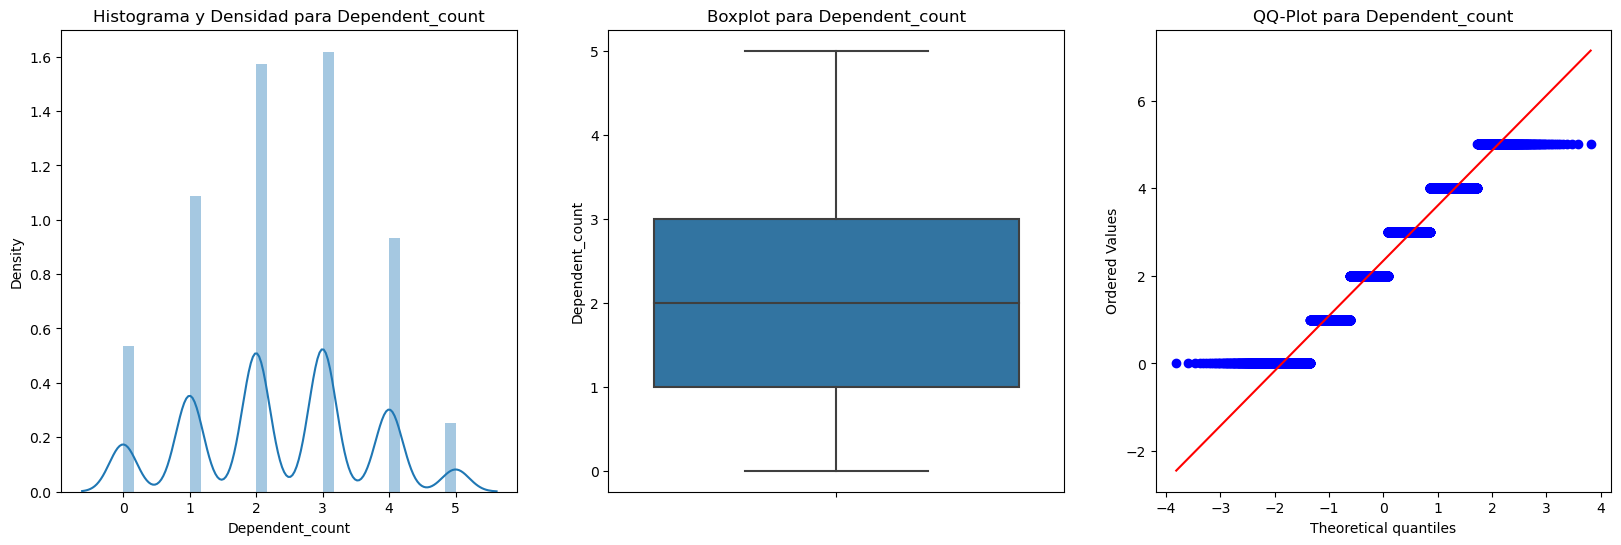

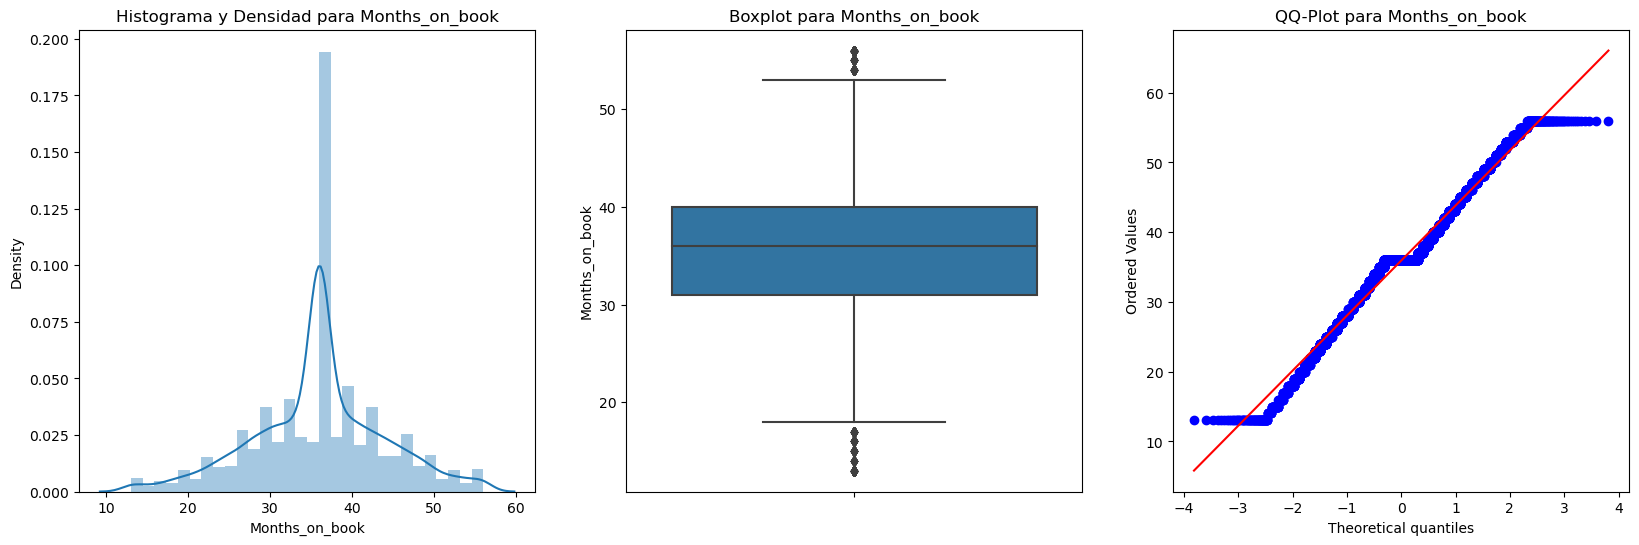

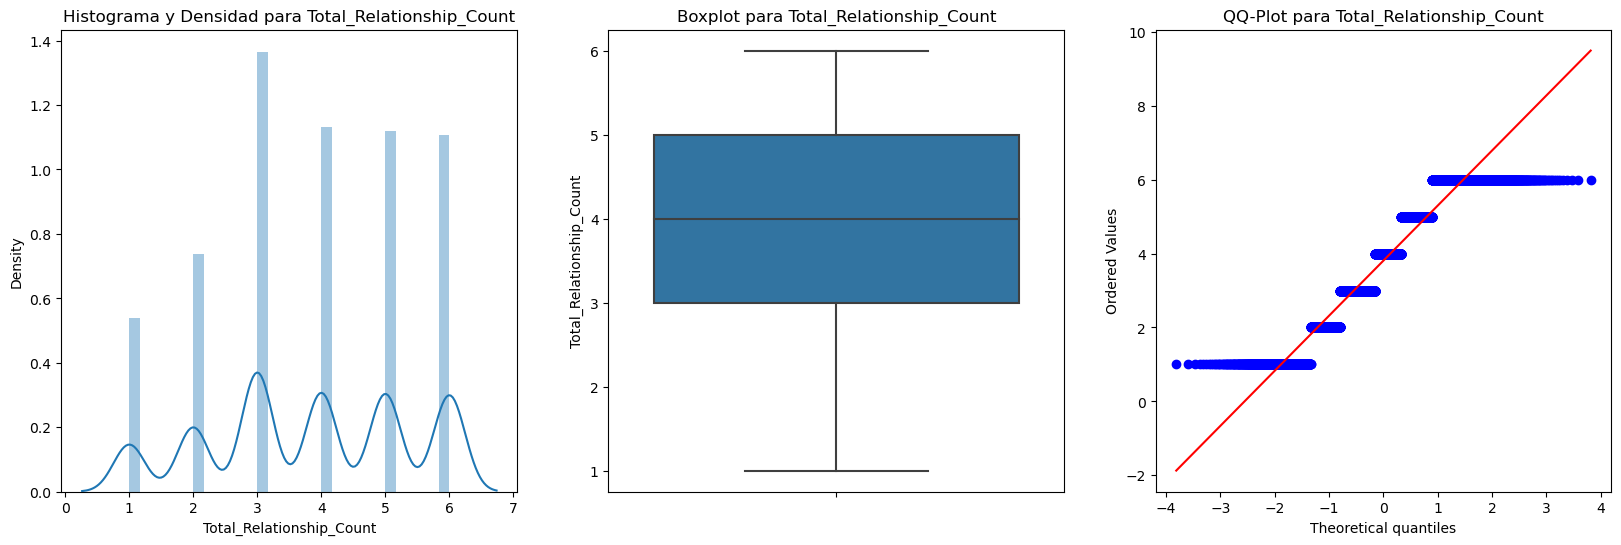

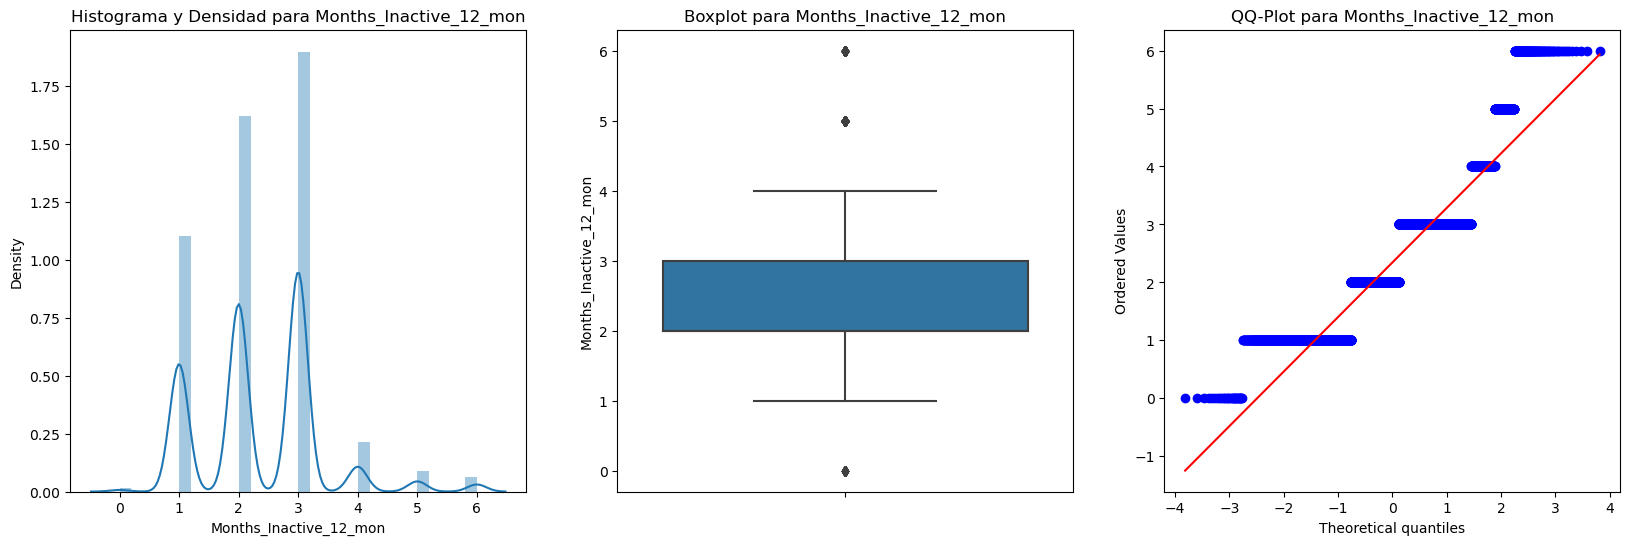

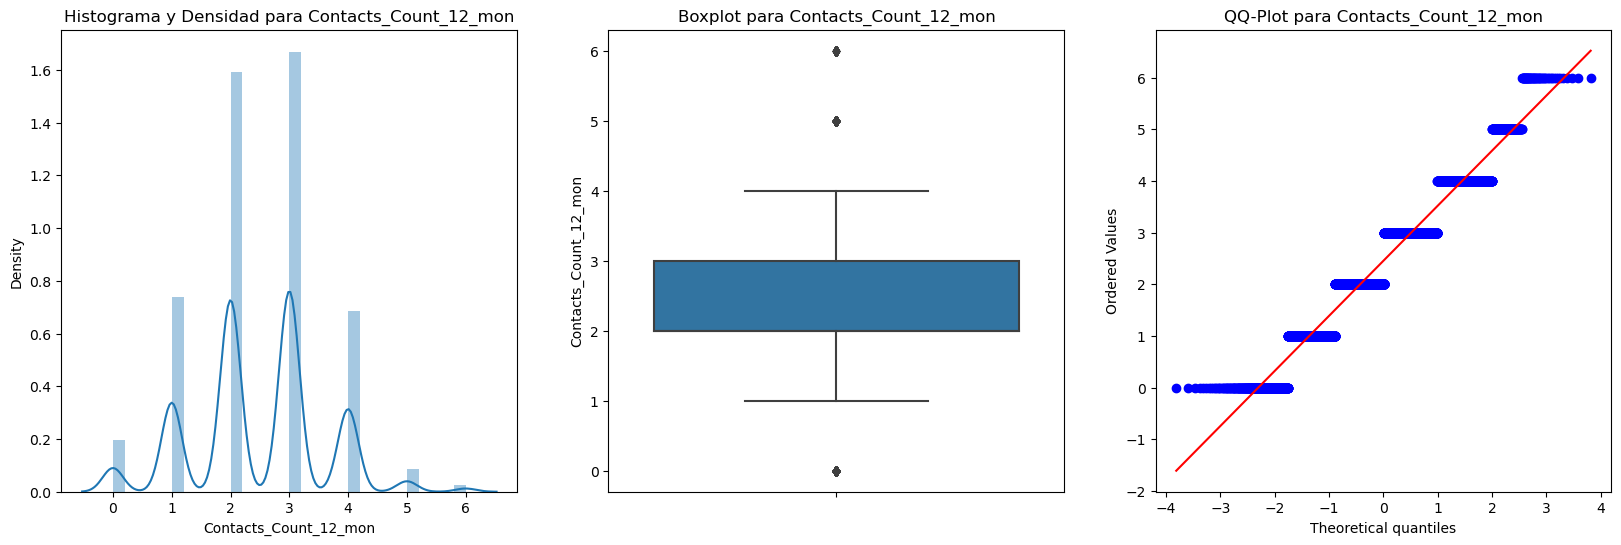

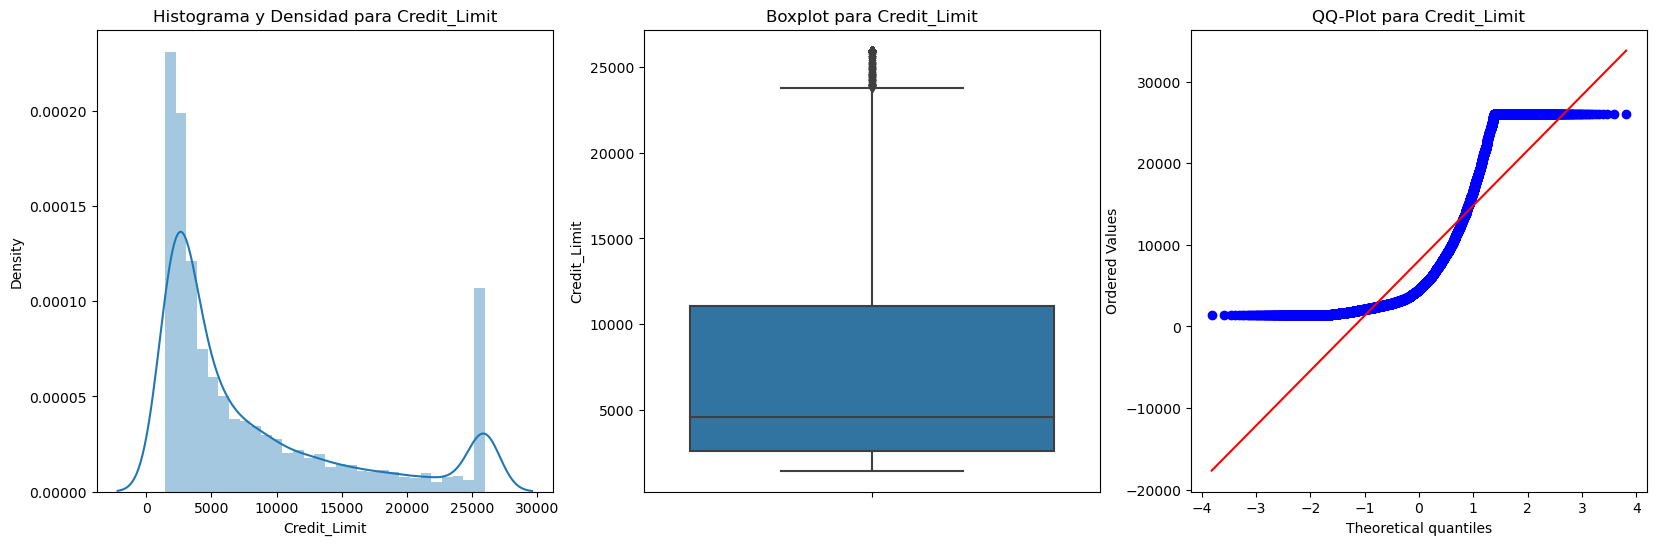

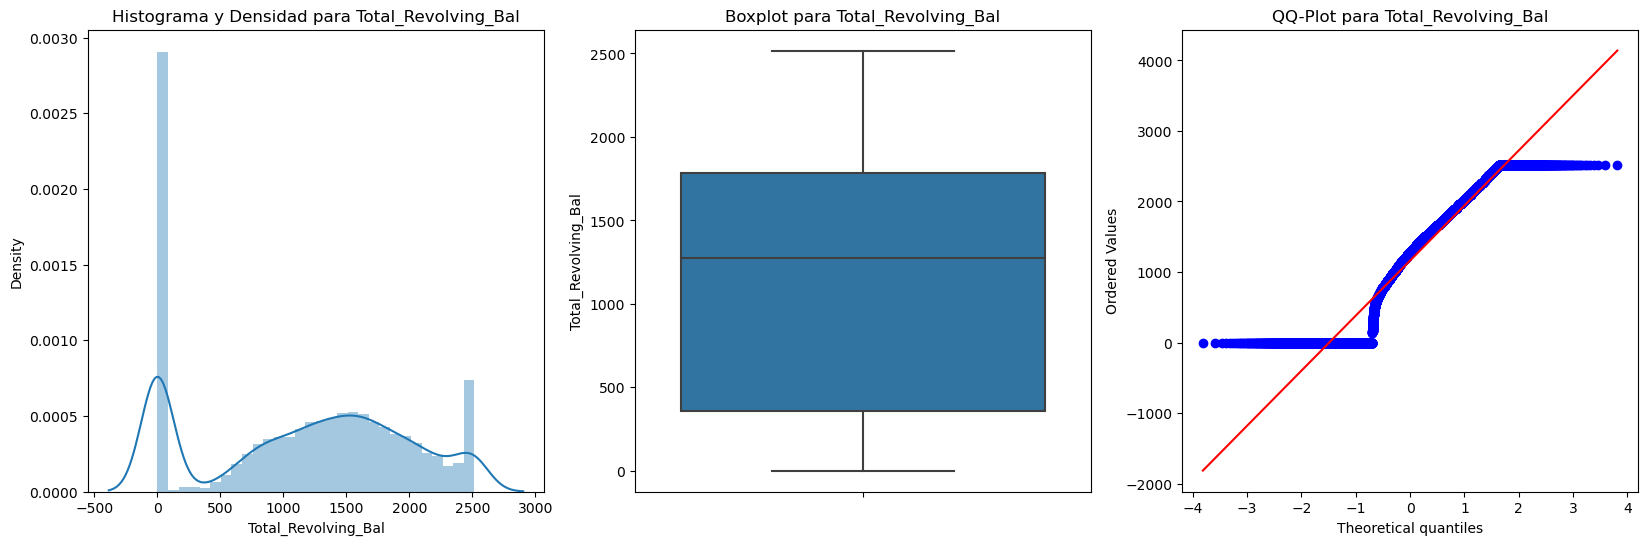

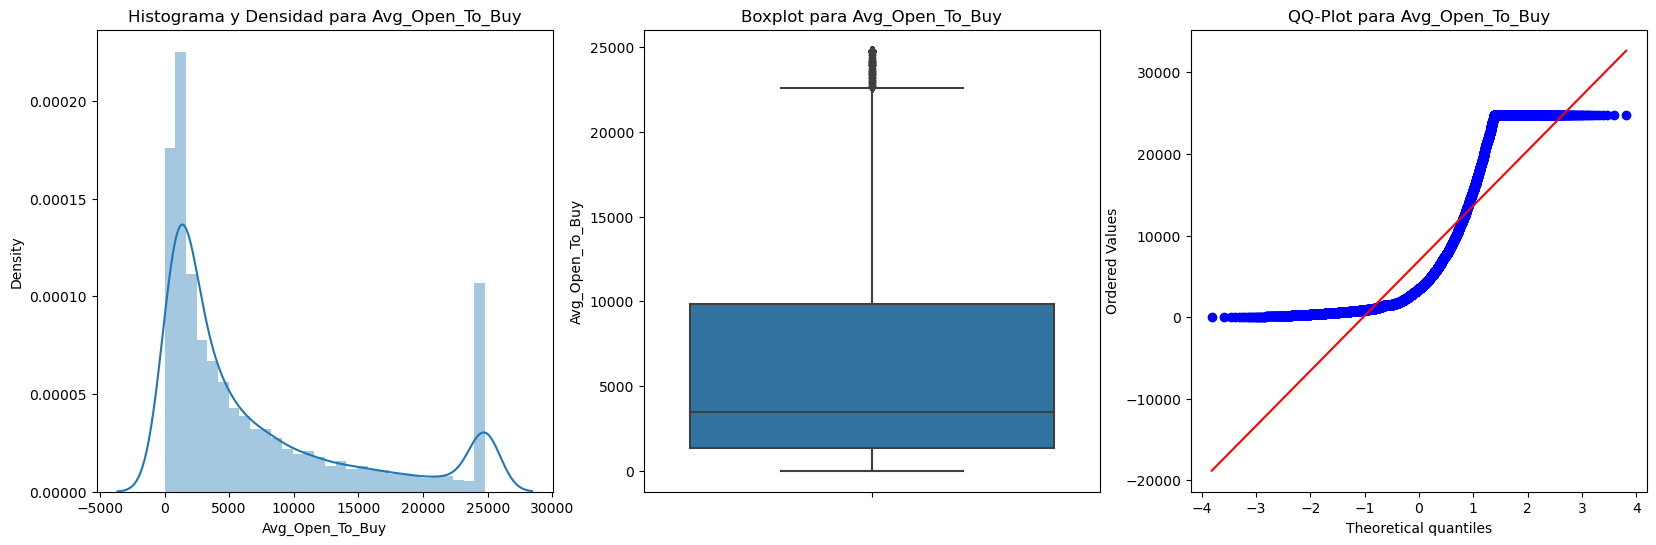

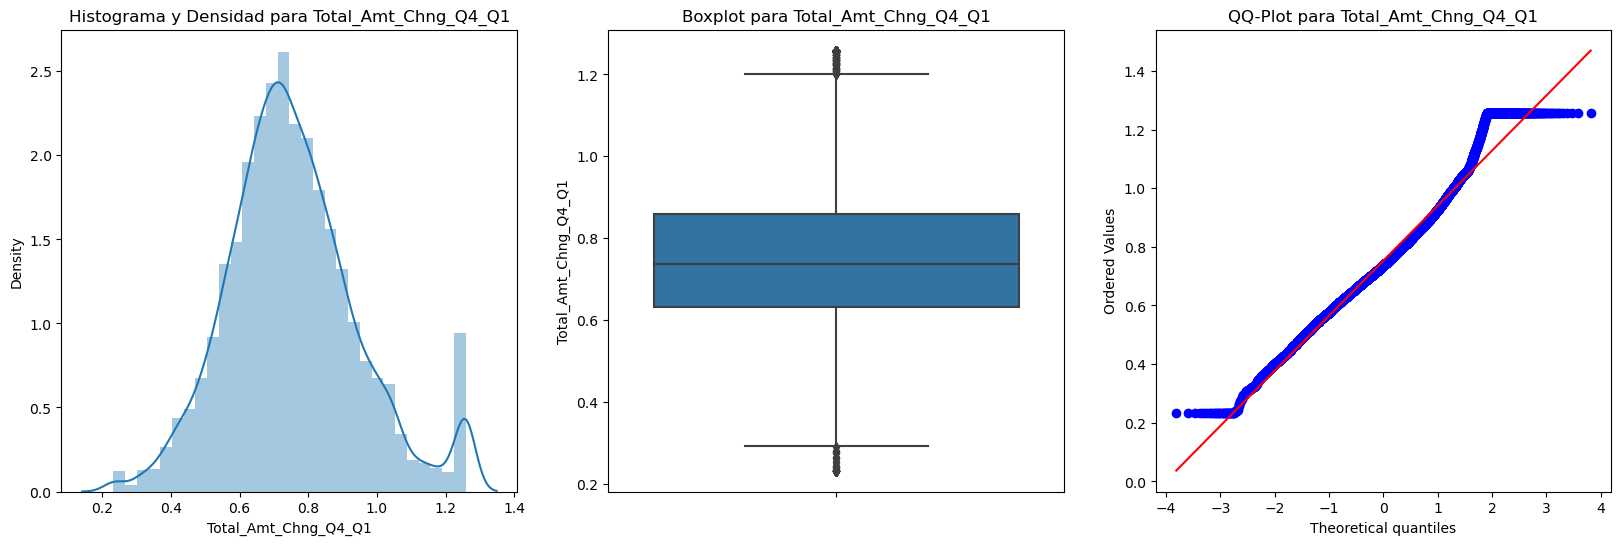

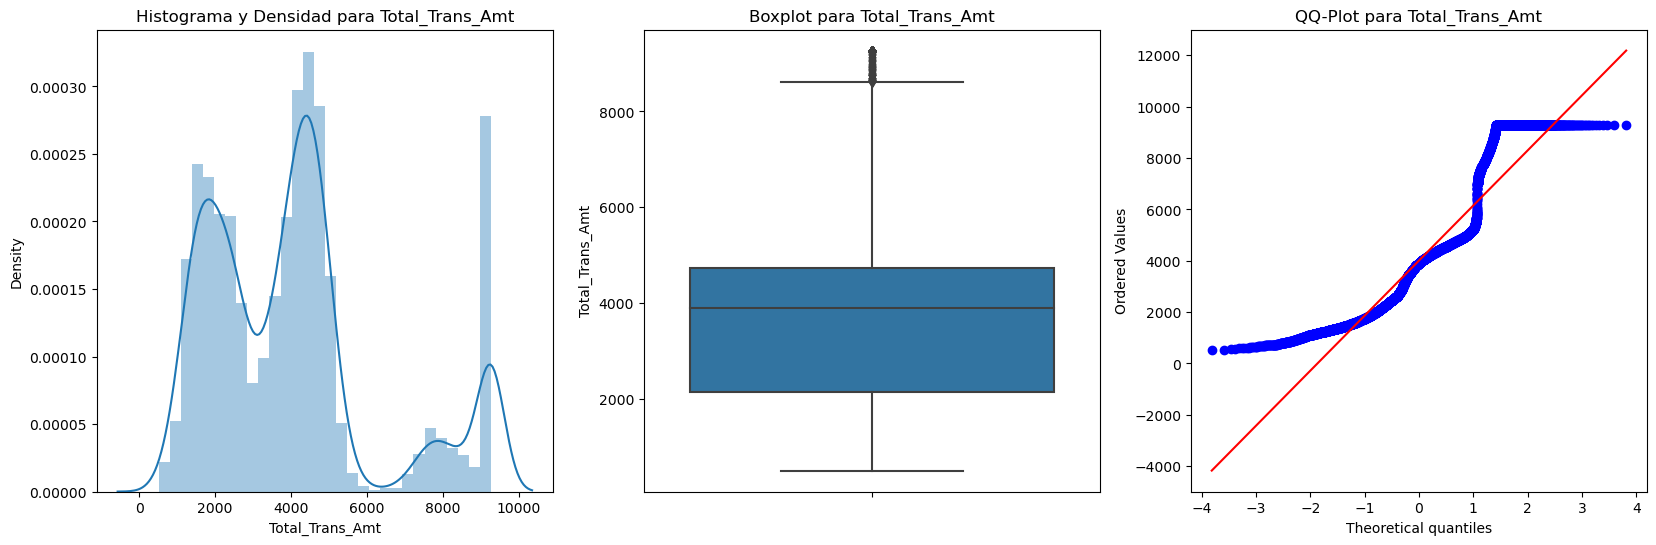

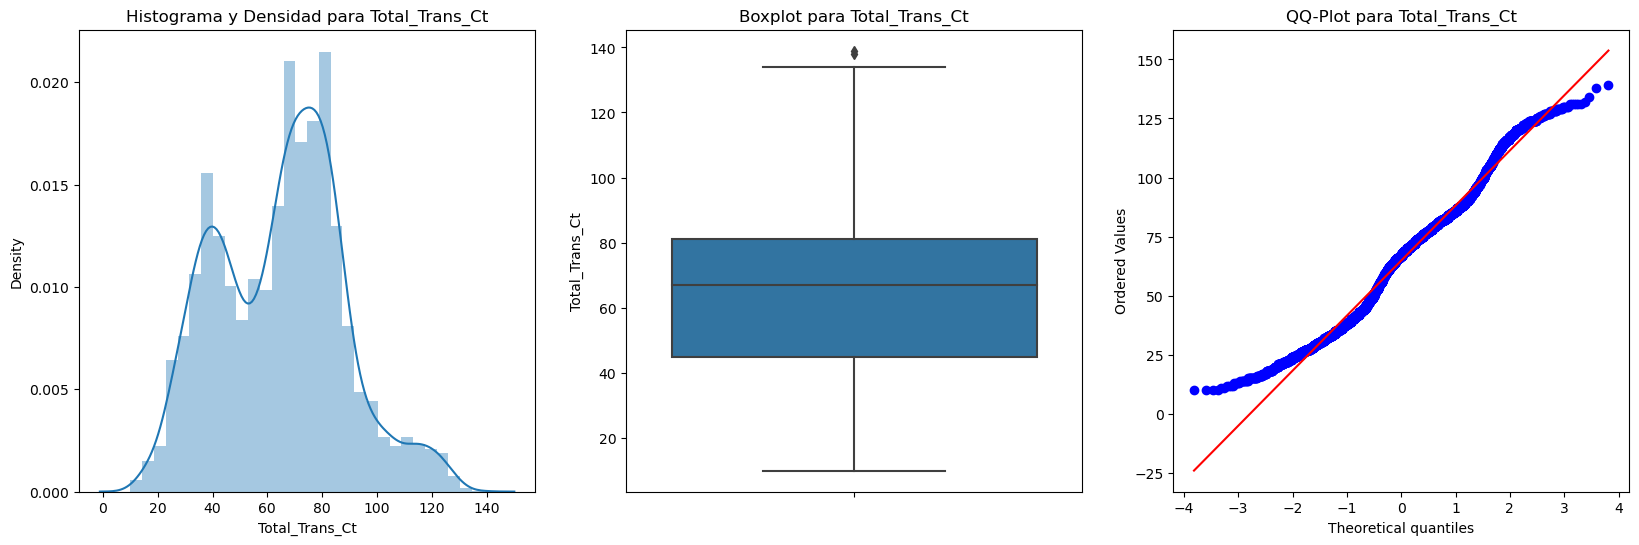

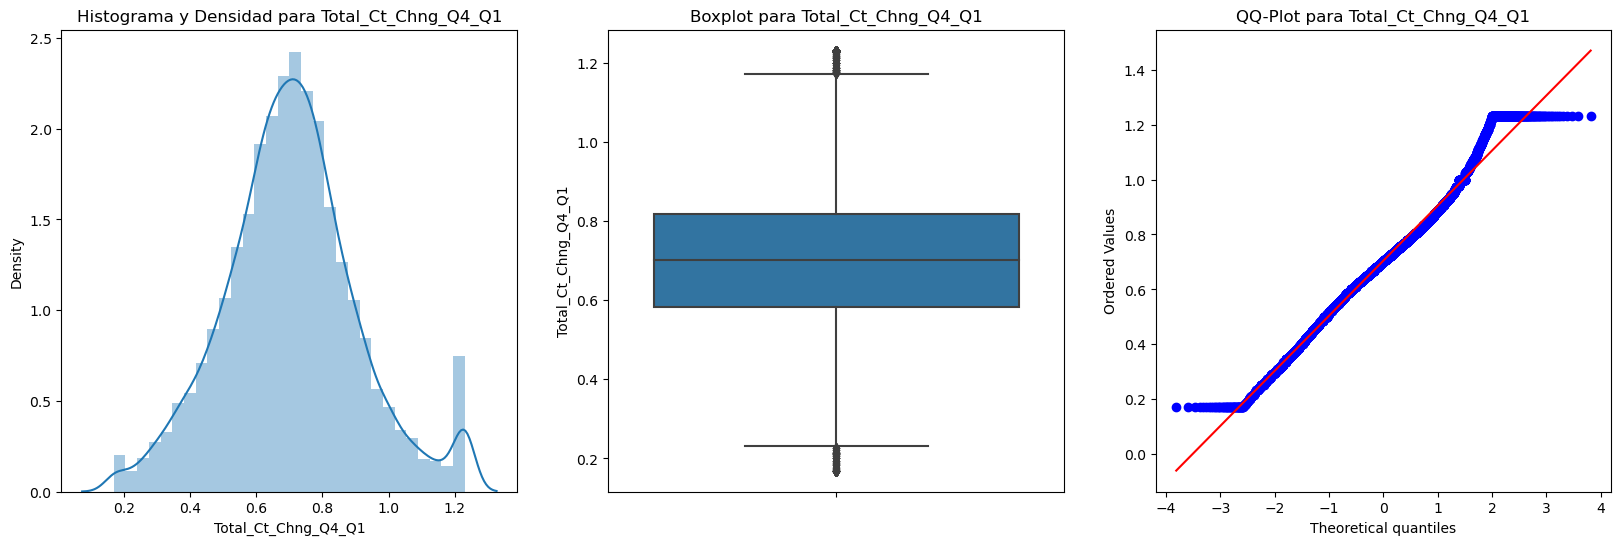

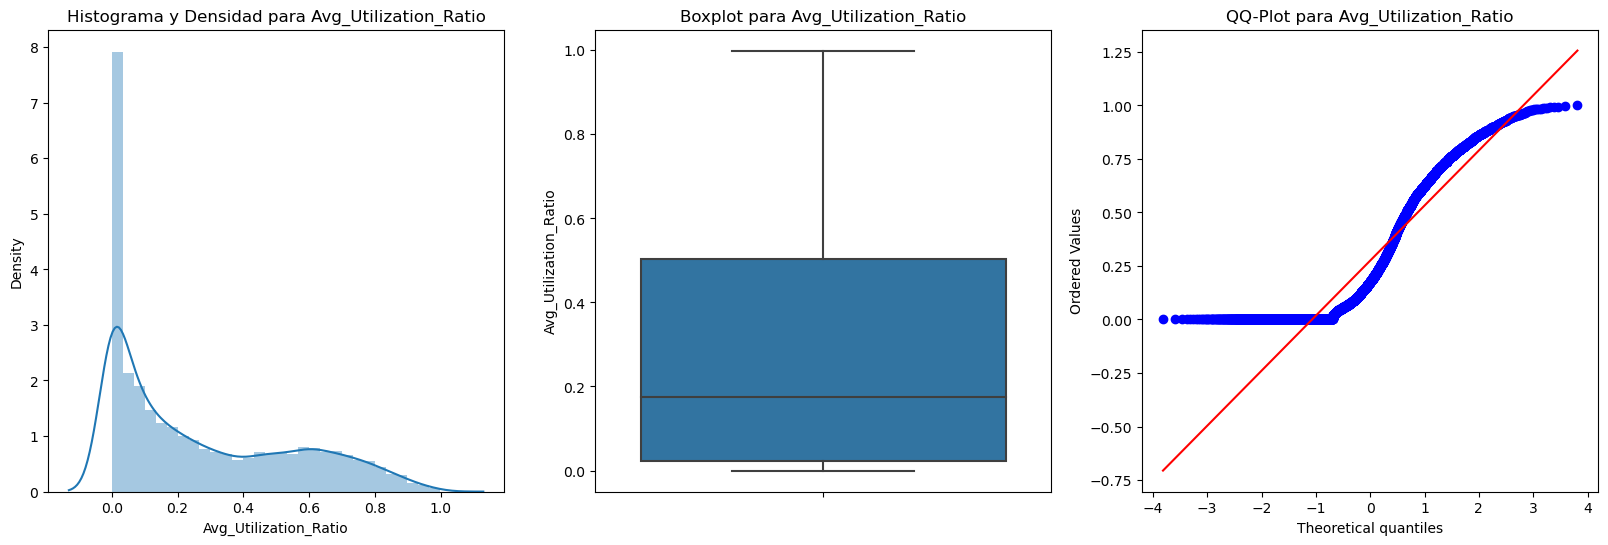

In [32]:
for col in continuas: 
    plotDistBoxQQ(data,col)

### Normalización de los datos 

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Lista de columnas continuas que deseas normalizar
columnas_continuas = ['Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Aplica la normalización Min-Max a las columnas continuas
data[columnas_continuas] = scaler.fit_transform(data[columnas_continuas])


In [35]:
# Ver los valores normalizados de las columnas continuas para las primeras 5 filas
print(data.head())


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer      0.419890      M                3   
1  818770008  Existing Customer      0.508287      F                5   
2  713982108  Existing Customer      0.552486      M                3   
3  769911858  Existing Customer      0.309392      F                4   
4  709106358  Existing Customer      0.309392      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44 

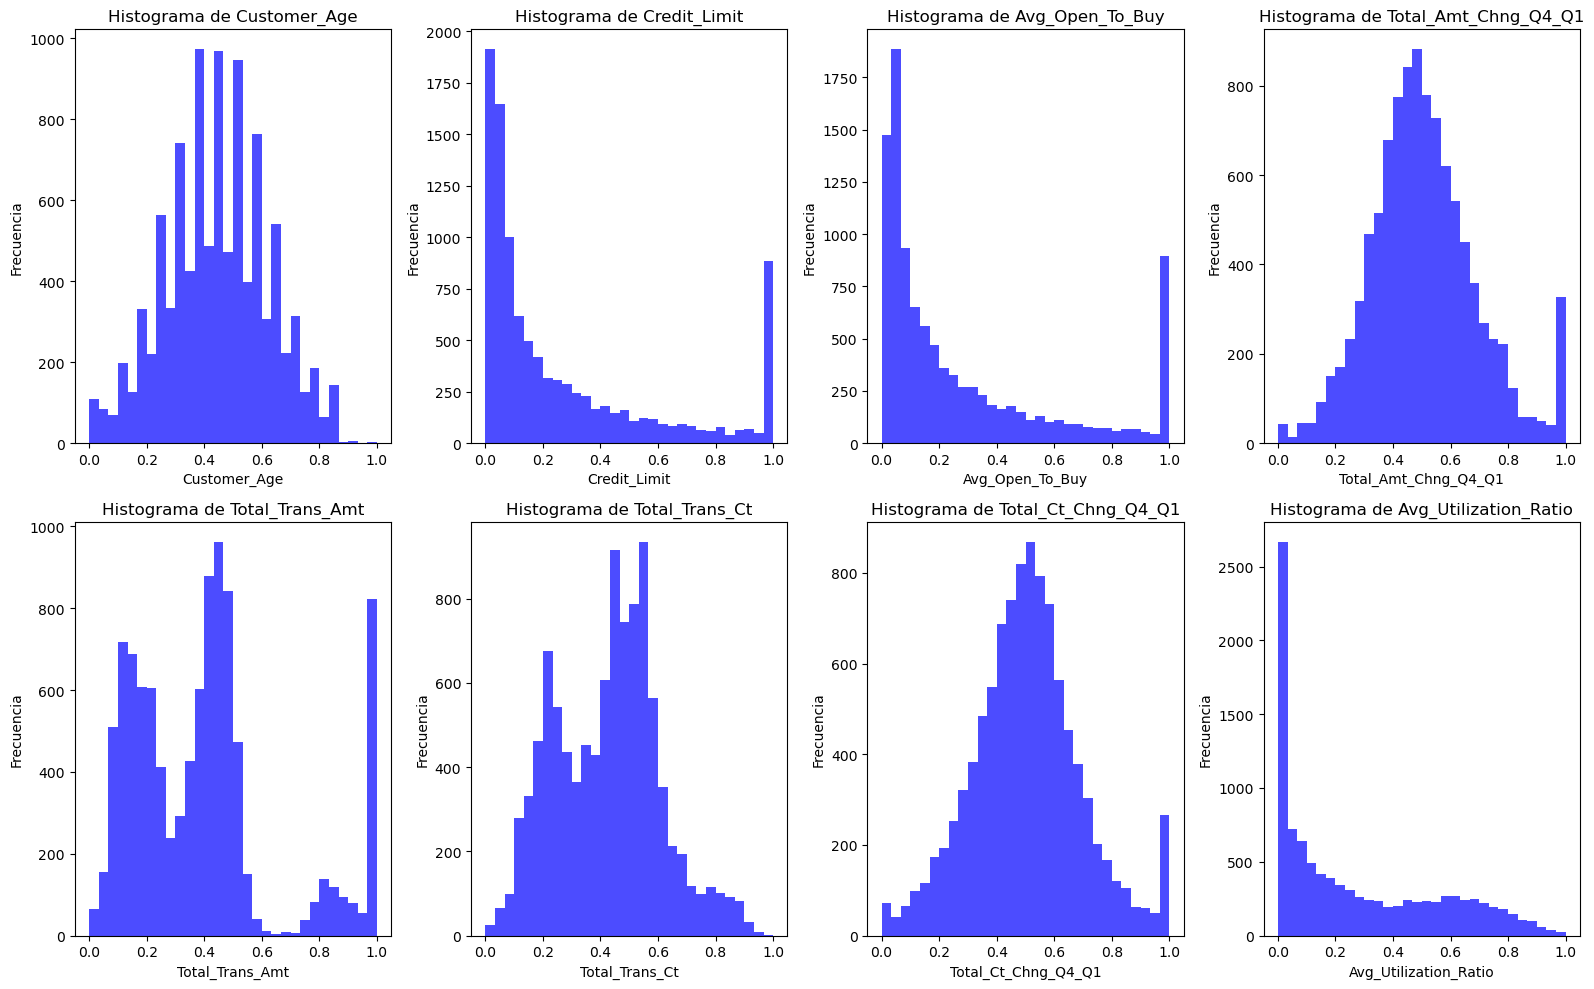

In [37]:
#Ahora lo vemos graficamente 
import matplotlib.pyplot as plt

# Lista de columnas continuas normalizadas
columnas_normalizadas = ['Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Configura la figura con múltiples subplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(columnas_normalizadas, 1):
    plt.subplot(2, 4, i)
    plt.hist(data[col], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Seleccionamos solo 3 variables para el nuevo dataset

In [41]:
data_limpio = data[['Avg_Open_To_Buy','Total_Trans_Ct','Avg_Utilization_Ratio']]

In [42]:
data_limpio

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
0,0.480449,0.248062,0.061061
1,0.298047,0.178295,0.105105
2,0.137750,0.077519,0.000000
3,0.031987,0.077519,0.760761
4,0.190106,0.139535,0.000000
...,...,...,...
10122,0.086683,0.829457,0.462462
10123,0.084223,0.457364,0.511512
10124,0.218060,0.387597,0.000000
10125,0.212897,0.403101,0.000000


### Preparación de los Cluster

In [38]:
from sklearn.cluster import KMeans 
import warnings

### Función de Inercia 

In [43]:
#Realizamos función de inercia 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

inercias = []
ks = []

for k in range(1, 15):
    modelo_iterado = KMeans(n_clusters=k, random_state=5)
    modelo_iterado.fit(data_limpio)
    inercias.append(modelo_iterado.inertia_)
    ks.append(k)

  File "C:\Users\Franz Castillo\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


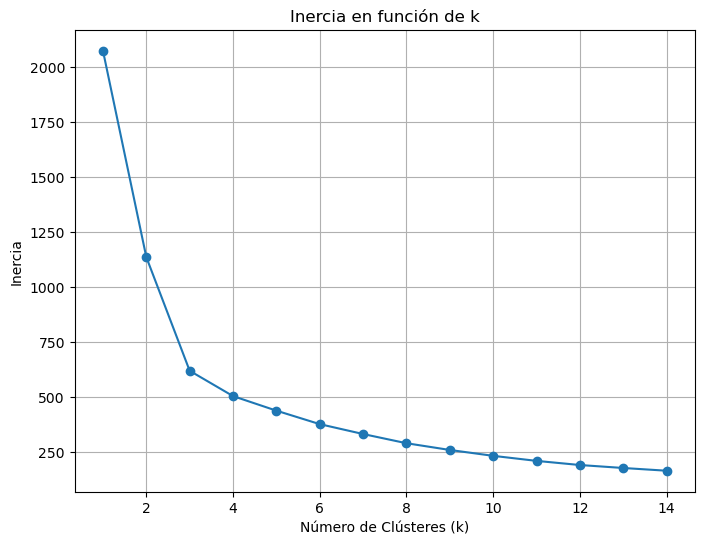

In [44]:
# Metodo del codo para determina la cantidad de clusters adecuada. 
plt.figure(figsize=(8, 6))
plt.plot(ks, inercias, marker='o')
plt.title('Inercia en función de k')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

### Modelo para K Means 

In [45]:
#Creamos el modelo con KMeans para los clusters. 
modelo = KMeans(n_clusters=3, random_state=10)
modelo.fit(data_limpio)

KMeans(n_clusters=3, random_state=10)

In [46]:
#Agregamos columna nueva llamada clusters, para saber en que cluster lo asigno. 
data_limpio['clusters']=modelo.labels_
data_limpio

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,clusters
0,0.480449,0.248062,0.061061,2
1,0.298047,0.178295,0.105105,2
2,0.137750,0.077519,0.000000,2
3,0.031987,0.077519,0.760761,0
4,0.190106,0.139535,0.000000,2
...,...,...,...,...
10122,0.086683,0.829457,0.462462,0
10123,0.084223,0.457364,0.511512,0
10124,0.218060,0.387597,0.000000,2
10125,0.212897,0.403101,0.000000,2


In [48]:
#Revisamos como quedaron los clusters. 
data_limpio.groupby(by='clusters').count()

,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
clusters,,,
0,3461,3461,3461
1,1930,1930,1930
2,4736,4736,4736


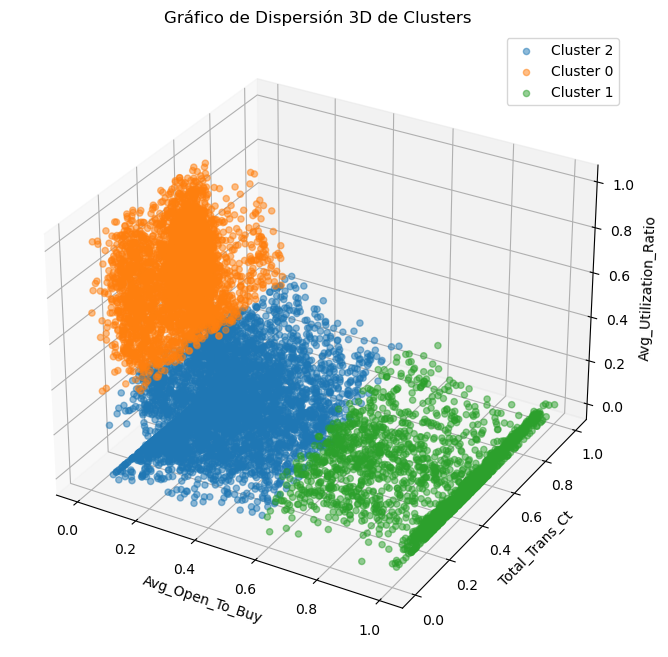

In [50]:
### Graficamos el Cluster 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Selecciona las tres variables para el gráfico de dispersión
variable1 = 'Avg_Open_To_Buy'
variable2 = 'Total_Trans_Ct'
variable3 = 'Avg_Utilization_Ratio'

# Crea un gráfico de dispersión en 3D para visualizar los clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in data_limpio['clusters'].unique():
    cluster_data = data_limpio[data_limpio['clusters'] == cluster]
    ax.scatter(cluster_data[variable1], cluster_data[variable2], cluster_data[variable3], label=f'Cluster {cluster}', alpha=0.5)

ax.set_title('Gráfico de Dispersión 3D de Clusters')
ax.set_xlabel(variable1)
ax.set_ylabel(variable2)
ax.set_zlabel(variable3)
ax.legend()
plt.show()


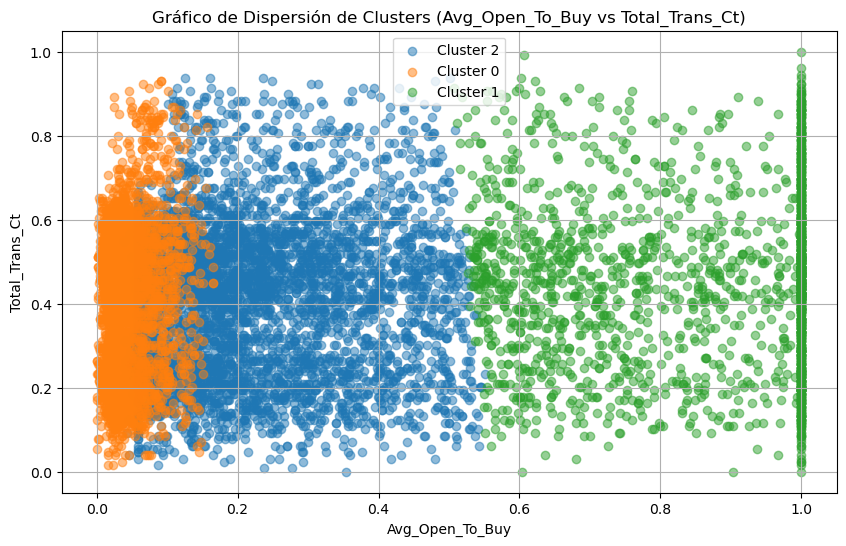

In [51]:
import matplotlib.pyplot as plt

# Selecciona las dos variables para el gráfico de dispersión
variable1 = 'Avg_Open_To_Buy'
variable2 = 'Total_Trans_Ct'

# Crea un gráfico de dispersión para visualizar los clusters en 2D
plt.figure(figsize=(10, 6))
for cluster in data_limpio['clusters'].unique():
    cluster_data = data_limpio[data_limpio['clusters'] == cluster]
    plt.scatter(cluster_data[variable1], cluster_data[variable2], label=f'Cluster {cluster}', alpha=0.5)

plt.title(f'Gráfico de Dispersión de Clusters ({variable1} vs {variable2})')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.legend()
plt.grid(True)
plt.show()


### Interpretación del cluster.

  clusters Avg_Open_To_Buy           Total_Trans_Ct            \
                      mean       std           mean       std   
0        0        0.044772  0.029140       0.429851  0.166009   
1        1        0.845890  0.168359       0.453416  0.204706   
2        2        0.218358  0.130158       0.410434  0.181758   

  Avg_Utilization_Ratio            
                   mean       std  
0              0.617835  0.151326  
1              0.047643  0.037126  
2              0.117473  0.117351  


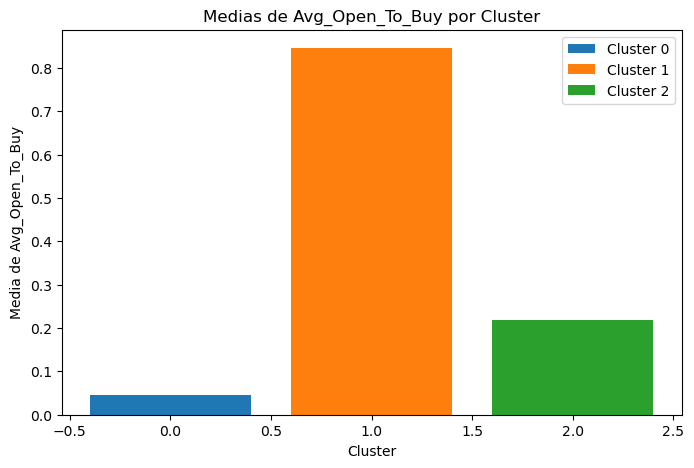

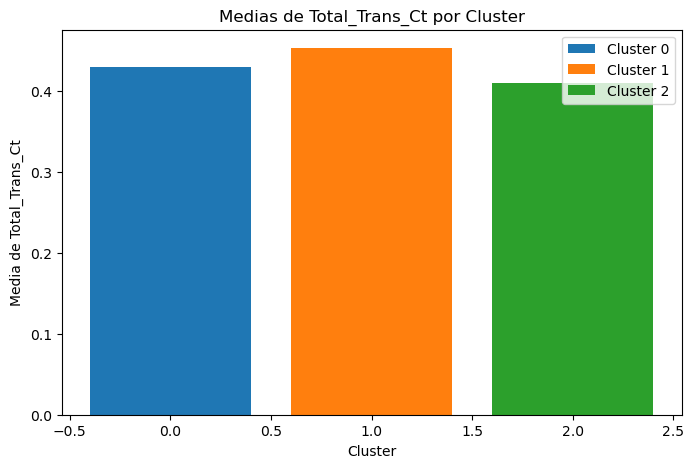

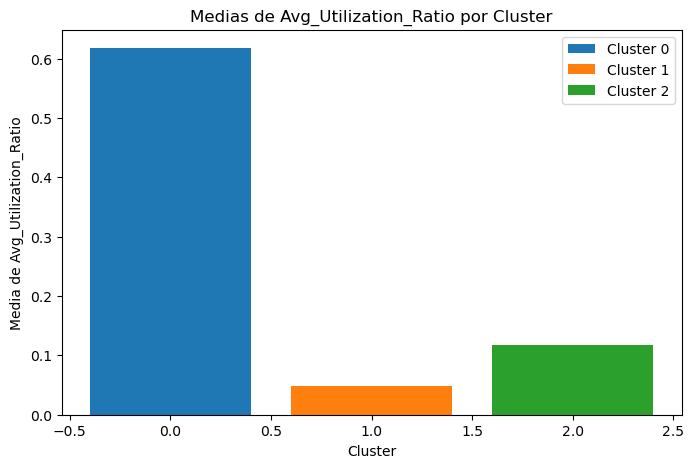

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'data_limpio' que contiene tus datos y una columna 'clusters' que indica a qué cluster pertenece cada observación.

# Calcular estadísticas descriptivas para cada variable en cada cluster
cluster_stats = data_limpio.groupby('clusters').agg({
    'Avg_Open_To_Buy': ['mean', 'std'],
    'Total_Trans_Ct': ['mean', 'std'],
    'Avg_Utilization_Ratio': ['mean', 'std']
}).reset_index()

# Visualizar las estadísticas descriptivas
print(cluster_stats)

# Crear gráficos de barras para las medias de cada variable en cada cluster
for col in ['Avg_Open_To_Buy', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']:
    plt.figure(figsize=(8, 5))
    for cluster in cluster_stats['clusters']:
        plt.bar(cluster, cluster_stats[(col, 'mean')][cluster], label=f'Cluster {cluster}')

    plt.title(f'Medias de {col} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Media de {col}')
    plt.legend()
    plt.show()


#### Interpretación: 
 
##### Cluster 0:

* Avg_Open_To_Buy: La media de Avg_Open_To_Buy en el Cluster 0 es aproximadamente 0.045, con una desviación estándar de 0.029. Esto significa que, en promedio, los clientes en este cluster tienen un saldo disponible moderado para realizar compras, con cierta variabilidad en los saldos.
* Total_Trans_Ct: La media de Total_Trans_Ct en el Cluster 0 es aproximadamente 0.430, con una desviación estándar de 0.166. Esto sugiere que los clientes en este cluster tienen un número moderado de transacciones, pero con cierta variabilidad en la cantidad de transacciones realizadas.
* Avg_Utilization_Ratio: La media de Avg_Utilization_Ratio en el Cluster 0 es aproximadamente 0.618, con una desviación estándar de 0.151. Esto indica que los clientes en este cluster tienden a utilizar su crédito en una proporción significativa, lo que sugiere un alto uso de tarjetas de crédito.

##### Cluster 1:

* Avg_Open_To_Buy: La media de Avg_Open_To_Buy en el Cluster 1 es aproximadamente 0.846, con una desviación estándar de 0.168. Esto indica que los clientes en este cluster tienen un saldo disponible considerablemente alto para realizar compras, con menos variabilidad que en el Cluster 0.
* Total_Trans_Ct: La media de Total_Trans_Ct en el Cluster 1 es aproximadamente 0.453, con una desviación estándar de 0.205. Los clientes en este cluster también tienen un número moderado de transacciones, pero con un poco más de variabilidad que en el Cluster 0.
* Avg_Utilization_Ratio: La media de Avg_Utilization_Ratio en el Cluster 1 es aproximadamente 0.048, con una desviación estándar de 0.037. Esto sugiere que los clientes en este cluster tienden a utilizar su crédito en una proporción mucho más baja que en otros clusters.
##### Cluster 2:

* Avg_Open_To_Buy: La media de Avg_Open_To_Buy en el Cluster 2 es aproximadamente 0.218, con una desviación estándar de 0.130. Esto indica que los clientes en este cluster tienen un saldo disponible moderado para compras, pero menor que en el Cluster 1.
* Total_Trans_Ct: La media de Total_Trans_Ct en el Cluster 2 es aproximadamente 0.410, con una desviación estándar de 0.182. Los clientes en este cluster tienen un número moderado de transacciones, similar al Cluster 0.
* Avg_Utilization_Ratio: La media de Avg_Utilization_Ratio en el Cluster 2 es aproximadamente 0.117, con una desviación estándar de 0.117. Esto sugiere que los clientes en este cluster tienen una utilización de crédito moderada, pero con mayor variabilidad que en el Cluster 0.

### Clasificación de los clientes

In [53]:
# Cluster 0 - Clientes de Alto Gasto
cluster_0_profile = {
    "Características Clave": [
        "Tienen un saldo disponible moderado para compras.",
        "Realizan un número moderado de transacciones mensuales.",
        "Utilizan su crédito en una proporción significativa (alta utilización de crédito)."
    ],
    "Estadísticas Relevantes": {
        "Avg_Open_To_Buy": {
            "Media": 0.045,
            "Desviación Estándar": 0.029
        },
        "Total_Trans_Ct": {
            "Media": 0.430,
            "Desviación Estándar": 0.166
        },
        "Avg_Utilization_Ratio": {
            "Media": 0.618,
            "Desviación Estándar": 0.151
        }
    }
}

# Cluster 1 - Clientes de Bajo Gasto pero Frecuentes
cluster_1_profile = {
    "Características Clave": [
        "Tienen un saldo disponible considerablemente alto para compras.",
        "Realizan un número moderado de transacciones mensuales.",
        "Utilizan su crédito en una proporción muy baja (baja utilización de crédito)."
    ],
    "Estadísticas Relevantes": {
        "Avg_Open_To_Buy": {
            "Media": 0.846,
            "Desviación Estándar": 0.168
        },
        "Total_Trans_Ct": {
            "Media": 0.453,
            "Desviación Estándar": 0.205
        },
        "Avg_Utilization_Ratio": {
            "Media": 0.048,
            "Desviación Estándar": 0.037
        }
    }
}

# Cluster 2 - Clientes de Gasto y Utilización Moderada
cluster_2_profile = {
    "Características Clave": [
        "Tienen un saldo disponible moderado para compras.",
        "Realizan un número moderado de transacciones mensuales.",
        "Tienen una utilización de crédito moderada con cierta variabilidad."
    ],
    "Estadísticas Relevantes": {
        "Avg_Open_To_Buy": {
            "Media": 0.218,
            "Desviación Estándar": 0.130
        },
        "Total_Trans_Ct": {
            "Media": 0.410,
            "Desviación Estándar": 0.182
        },
        "Avg_Utilization_Ratio": {
            "Media": 0.117,
            "Desviación Estándar": 0.117
        }
    }
}

# Imprimir los perfiles de cluster
print("Cluster 0 - Clientes de Alto Gasto:")
print(cluster_0_profile)
print("\nCluster 1 - Clientes de Bajo Gasto pero Frecuentes:")
print(cluster_1_profile)
print("\nCluster 2 - Clientes de Gasto y Utilización Moderada:")
print(cluster_2_profile)


Cluster 0 - Clientes de Alto Gasto:
{'Características Clave': ['Tienen un saldo disponible moderado para compras.', 'Realizan un número moderado de transacciones mensuales.', 'Utilizan su crédito en una proporción significativa (alta utilización de crédito).'], 'Estadísticas Relevantes': {'Avg_Open_To_Buy': {'Media': 0.045, 'Desviación Estándar': 0.029}, 'Total_Trans_Ct': {'Media': 0.43, 'Desviación Estándar': 0.166}, 'Avg_Utilization_Ratio': {'Media': 0.618, 'Desviación Estándar': 0.151}}}

Cluster 1 - Clientes de Bajo Gasto pero Frecuentes:
{'Características Clave': ['Tienen un saldo disponible considerablemente alto para compras.', 'Realizan un número moderado de transacciones mensuales.', 'Utilizan su crédito en una proporción muy baja (baja utilización de crédito).'], 'Estadísticas Relevantes': {'Avg_Open_To_Buy': {'Media': 0.846, 'Desviación Estándar': 0.168}, 'Total_Trans_Ct': {'Media': 0.453, 'Desviación Estándar': 0.205}, 'Avg_Utilization_Ratio': {'Media': 0.048, 'Desviación E